# EDA cho Cột V và ID
Trong cuộc thi này, chúng tôi sẽ để phân tích cột V và ID, chúng tôi cũng làm rõ mối tương quan giữa các cột C, D và M.

Các cột V có vẻ dư thừa và tương quan. Do đó, đối với mỗi khối V cột có cấu trúc NAN tương tự, chúng tôi có thể tìm thấy các tập con trong khối có tương quan với nhau (r> 0,75). Sau đó, chúng tôi có thể thay thế toàn bộ khối bằng một cột từ mỗi tập hợp con.

Ví dụ trong khối `V1-V11`, chúng tôi thấy rằng các tập con` [[1], [2,3], [4,5], [6,7], [8,9], [10,11] ] `tồn tại và chúng tôi có thể chọn` [1, 3, 4, 6, 8, 11] `để đại diện cho khối` V1-V11` mà không làm mất nhiều thông tin. Ngoài ra, có thể áp dụng PCA trên mỗi khối, nhưng phương pháp giảm tập hợp con này chúng tôi quan sát được hoạt động tốt hơn.


In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np,gc
import pandas as pd 
pd.set_option('display.max_columns', 500)

# Truyền các tệp dữ liệu đầu vào có sẵn trong thư mục "../input/".

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/ieee-fraud-detection/sample_submission.csv
/kaggle/input/ieee-fraud-detection/test_identity.csv
/kaggle/input/ieee-fraud-detection/train_identity.csv
/kaggle/input/ieee-fraud-detection/test_transaction.csv
/kaggle/input/ieee-fraud-detection/train_transaction.csv


In [2]:
cols_t = ['TransactionID', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6',
       'addr1', 'addr2', 'dist1', 'dist2', 'P_emaildomain', 'R_emaildomain',
       'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11',
       'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8',
       'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'M1', 'M2', 'M3', 'M4',
       'M5', 'M6', 'M7', 'M8', 'M9']
cols_v = ['V'+str(x) for x in range(1,340)]; types_v = {}
for c in cols_v: types_v[c] = 'float32'
train = pd.read_csv('../input/ieee-fraud-detection/train_transaction.csv',usecols=cols_t+['isFraud']+cols_v,dtype=types_v)

## Tìm kiếm NAN
Chúng tôi sẽ tìm kiếm tất cả các cột của train_transaction.csv để xác định cột nào có liên quan với số lượng NAN hiện có. Chúng tôi sẽ xét độ tương quan của các cột cùng lại rồi sau đó chỉ để lại các cột đai diện.

In [3]:
nans_df = train.isna()
nans_df

TransactionID  isFraud  TransactionDT  TransactionAmt  ProductCD  \
0               False    False          False           False      False   
1               False    False          False           False      False   
2               False    False          False           False      False   
3               False    False          False           False      False   
4               False    False          False           False      False   
...               ...      ...            ...             ...        ...   
590535          False    False          False           False      False   
590536          False    False          False           False      False   
590537          False    False          False           False      False   
590538          False    False          False           False      False   
590539          False    False          False           False      False   

        card1  card2  card3  card4  card5  card6  addr1  addr2  dist1  dist2  \
0       False   True  False  False  False  False  False  False  False   True   
1       False  False  False  False  False  False  False  False   True   True   
2       False  False  False  False  False  False  False  False  False   True   
3       False  False  False  False  False  False  False  False   True   True   
4       False  False  False  False  False  False  False  False   True   True   
...       ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
590535  False   True  False  False  False  False  False  False  False   True   
590536  False  False  False  False  False  False  False  False   True   True   
590537  False  False  False  False  False  False  False  False   True   True   
590538  False  False  False  False  False  False  False  False  False   True   
590539  False  False  False  False  False  False  False  False   True   True   

        P_emaildomain  R_emaildomain     C1     C2     C3     C4     C5  \
0                True           True  False  False  False  False  False   
1               False           True  False  False  False  False  False   
2               False           True  False  False  False  False  False   
3               False           True  False  False  False  False  False   
4               False           True  False  False  False  False  False   
...               ...            ...    ...    ...    ...    ...    ...   
590535           True           True  False  False  False  False  False   
590536          False           True  False  False  False  False  False   
590537          False           True  False  False  False  False  False   
590538          False           True  False  False  False  False  False   
590539          False           True  False  False  False  False  False   

           C6     C7     C8     C9    C10    C11    C12    C13    C14     D1  \
0       False  False  False  False  False  False  False  False  False  False   
1       False  False  False  False  False  False  False  False  False  False   
2       False  False  False  False  False  False  False  False  False  False   
3       False  False  False  False  False  False  False  False  False  False   
4       False  False  False  False  False  False  False  False  False  False   
...       ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
590535  False  False  False  False  False  False  False  False  False  False   
590536  False  False  False  False  False  False  False  False  False  False   
590537  False  False  False  False  False  False  False  False  False  False   
590538  False  False  False  False  False  False  False  False  False  False   
590539  False  False  False  False  False  False  False  False  False  False   

           D2     D3     D4     D5    D6    D7    D8    D9    D10    D11  \
0        True  False   True   True  True  True  True  True  False  False   
1        True   True  False   True  True  True  True  True  False   True   
2        True   True  False   True  True  Tr

In [4]:
# Tìm các cột có số lượng NAN bằng nhau của cột V
nans_df = train.isna()
nans_groups={}
i_cols = ['V'+str(i) for i in range(1,340)]
for col in train.columns:
    if col[0] == 'V':
        cur_group = nans_df[col].sum()
        try:
            nans_groups[cur_group].append(col)
        except:
            nans_groups[cur_group]=[col]
del nans_df; x=gc.collect()

for k,v in nans_groups.items():
    print('####### NAN count =',k)
    print(v)

####### NAN count = 279287
['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11']
####### NAN count = 76073
['V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34']
####### NAN count = 168969
['V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52']
####### NAN count = 77096
['V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74']
####### NAN count = 89164
['V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90', 'V91', 'V92', 'V93', 'V94']
####### NAN count = 314
['V95', 'V96', 'V97', 'V98', 'V99', 'V100', 'V101', 'V102', 'V103', 'V104', 'V105', 'V106', 'V107', 'V108', 'V109', 'V110', 'V111', 'V112', 'V113', 'V114', 'V115', 'V116', 'V117', 'V118', 'V

### V1-V11

In [5]:
Vs = nans_groups[279287]
# ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11']
Vtitle = 'V1 - V11'

(array([1.69633e+05, 0.00000e+00, 1.35148e+05, 0.00000e+00, 5.67200e+03,
        0.00000e+00, 6.08000e+02, 0.00000e+00, 1.90000e+02, 2.00000e+00]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ],
       dtype=float32),
 <a list of 10 Patch objects>)

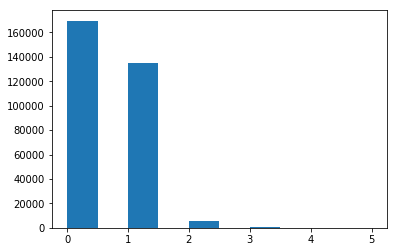

In [6]:
v= 'V11'
idx = train[~train[Vs[0]].isna()].index
np.sum(train.loc[idx,v]!=train.loc[idx,v].astype(int))
plt.hist(train.loc[idx,v])

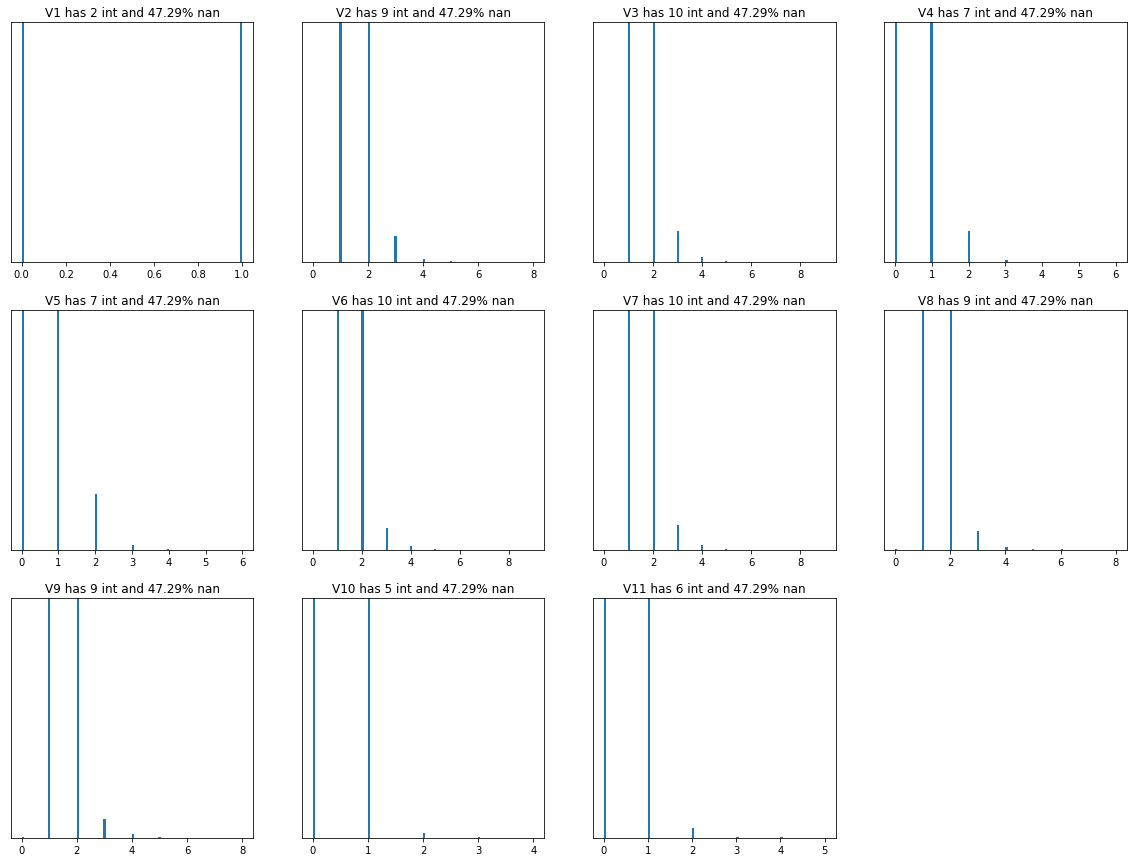

In [7]:
def make_plots(Vs):
    col = 4
    row = len(Vs)//4+1
    plt.figure(figsize=(20,row*5))
    idx = train[~train[Vs[0]].isna()].index # mảng các chỉ số của transation có giá trị của trường 'V1' không phải là nan 
    for i,v in enumerate(Vs):
        plt.subplot(row,col,i+1)
        n = train[v].nunique() # số các giá trị không phải là nan và là unique của trường v 
        number_of_value_is_not_int = np.sum(train.loc[idx,v]!=train.loc[idx,v].astype(int)) # Số lượng các transaction có giá trị trường v là int
        y = np.round(100*np.sum(train[v].isna())/len(train),2) # Số lượng các transaction có giá trị trường v là nan
        t = 'int'
        if number_of_value_is_not_int!=0: t = 'float'
        plt.title(v+' has '+str(n)+' '+t+' and '+str(y)+'% nan')
        plt.yticks([])
        h = plt.hist(train.loc[idx,v],bins=100)
        if len(h[0])>1: plt.ylim((0,np.sort(h[0])[-2]))
    plt.show()
make_plots(Vs)

In [8]:
cols = ['TransactionDT'] + Vs
train[cols].corr()

TransactionDT        V1        V2        V3        V4  \
TransactionDT       1.000000  0.001360  0.043891  0.044199  0.035831   
V1                  0.001360  1.000000  0.032168  0.024830  0.014216   
V2                  0.043891  0.032168  1.000000  0.773039  0.318554   
V3                  0.044199  0.024830  0.773039  1.000000  0.243684   
V4                  0.035831  0.014216  0.318554  0.243684  1.000000   
V5                  0.033098  0.013619  0.305504  0.353767  0.915164   
V6                  0.038139  0.032284  0.621459  0.472570  0.279596   
V7                  0.038193  0.026016  0.496921  0.546875  0.221621   
V8                  0.036905  0.040820  0.732730  0.556536  0.325873   
V9                  0.035587  0.034009  0.618591  0.653087  0.273207   
V10                 0.013485  0.006574  0.036884 -0.005272 -0.013160   
V11                 0.015652  0.006408  0.037459  0.022911 -0.016662   

                     V5        V6        V7        V8        V9       V10  \
TransactionDT  0.033098  0.038139  0.038193  0.036905  0.035587  0.013485   
V1             0.013619  0.032284  0.026016  0.040820  0.034009  0.006574   
V2             0.305504  0.621459  0.496921  0.732730  0.618591  0.036884   
V3             0.353767  0.472570  0.546875  0.556536  0.653087 -0.005272   
V4             0.915164  0.279596  0.221621  0.325873  0.273207 -0.013160   
V5             1.000000  0.261490  0.294447  0.308716  0.354257 -0.035405   
V6             0.261490  1.000000  0.796027  0.675501  0.561332  0.040767   
V7             0.294447  0.796027  1.000000  0.538586  0.594988  0.014593   
V8             0.308716  0.675501  0.538586  1.000000  0.835342  0.061869   
V9             0.354257  0.561332  0.594988  0.835342  1.000000  0.034524   
V10           -0.035405  0.040767  0.014593  0.061869  0.034524  1.000000   
V11           -0.021949  0.038673  0.039807  0.058033  0.055620  0.968670   

                    V11  
TransactionDT  0.015652  
V1             0.006408  
V2             0.037459  
V3             0.022911  
V4            -0.016662  
V5            -0.021949  
V6             0.038673  
V7             0.039807  
V8             0.058033  
V9             0.055620  
V10            0.968670  
V11            1.000000

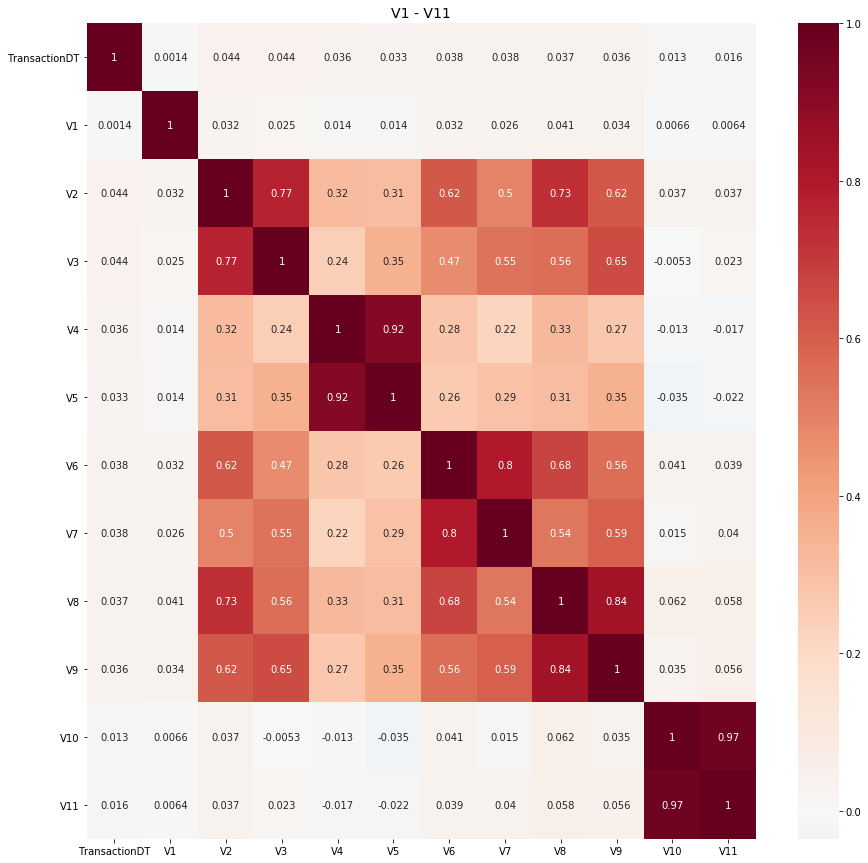

In [9]:
def make_corr(Vs,Vtitle=''):
    cols = ['TransactionDT'] + Vs
    plt.figure(figsize=(15,15))
    sns.heatmap(train[cols].corr(), cmap='RdBu_r', annot=True, center=0.0)
    if Vtitle!='': plt.title(Vtitle,fontsize=14)
    else: plt.title(Vs[0]+' - '+Vs[-1],fontsize=14)
    plt.show()
make_corr(Vs,Vtitle)

In [10]:
# Chọn các côt V đại diện 
grps = [[1],[2,3],[4,5],[6,7],[8,9],[10,11]]
def reduce_group(grps,c='V'):
    use = []
    for g in grps:
        mx = 0; vx = g[0]
        for gg in g:
            n = train[c+str(gg)].nunique()
            if n>mx:
                mx = n
                vx = gg
            #print(str(gg)+'-'+str(n),', ',end='')
        use.append(vx)
        #print()
    print('Use these',use)
reduce_group(grps)

Use these [1, 3, 4, 6, 8, 11]


### V12 - V34

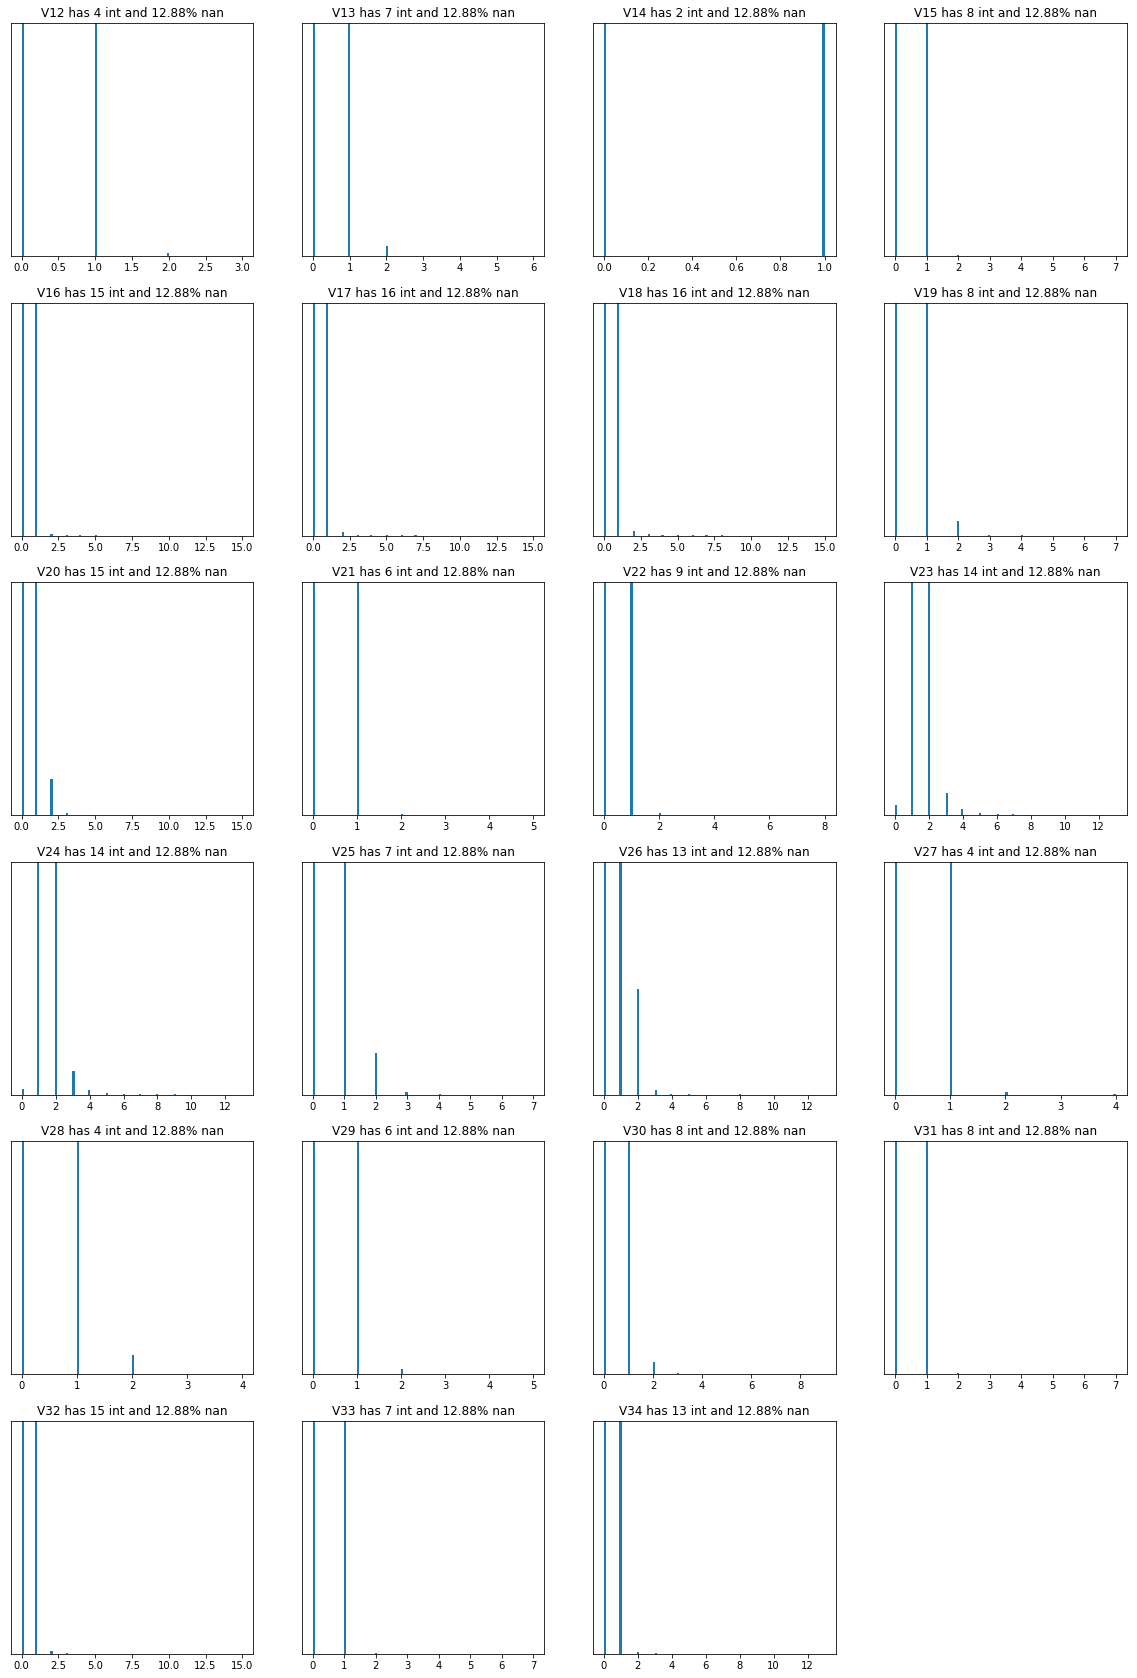

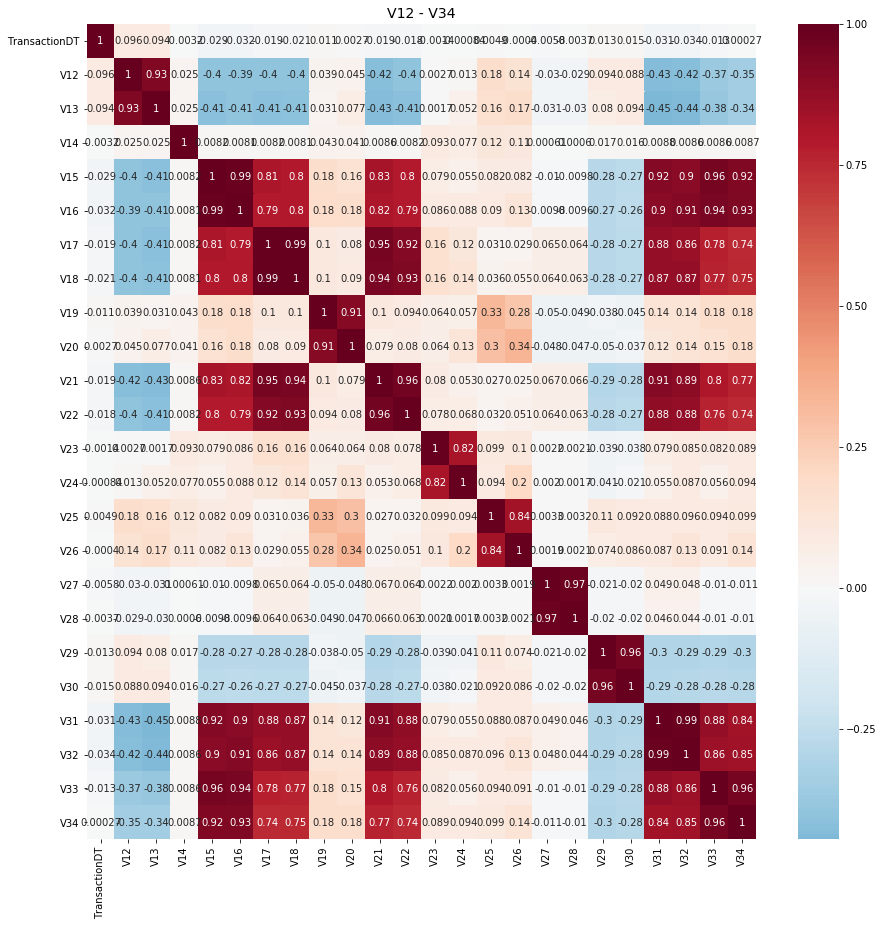

In [11]:
Vs = nans_groups[76073]
make_plots(Vs)
make_corr(Vs)

In [12]:
grps = [[12,13],[14],[15,16,17,18,21,22,31,32,33,34],[19,20],[23,24],[25,26],[27,28],[29,30]]
reduce_group(grps)

Use these [13, 14, 17, 20, 23, 26, 27, 30]


### V35 - V52

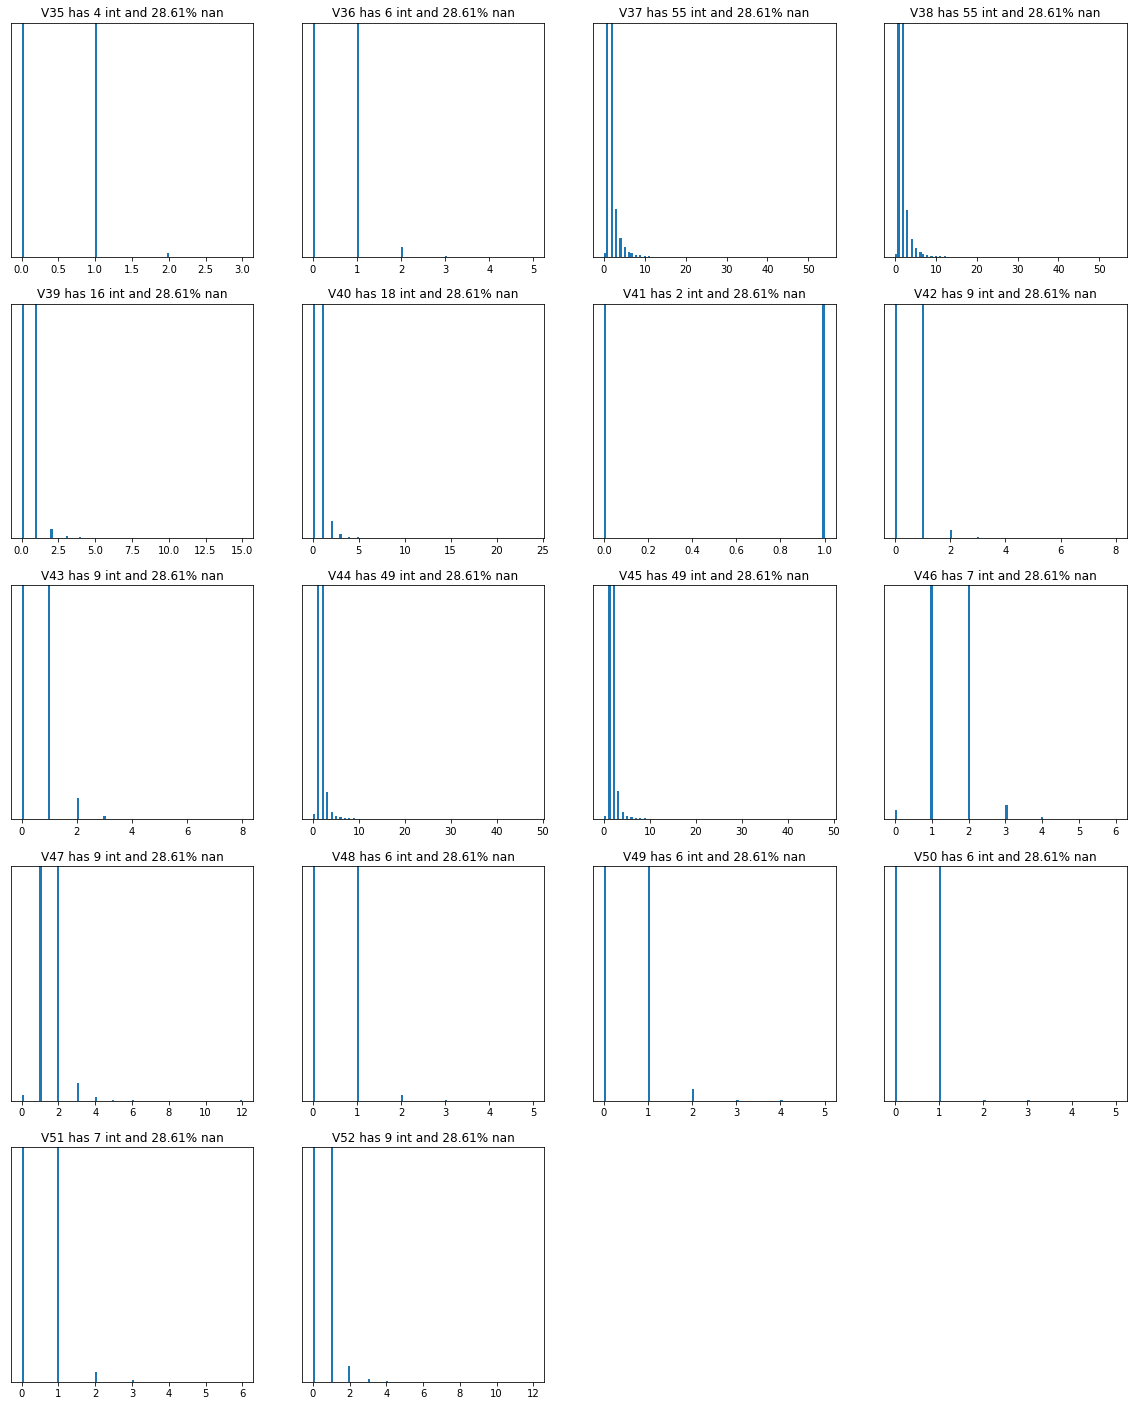

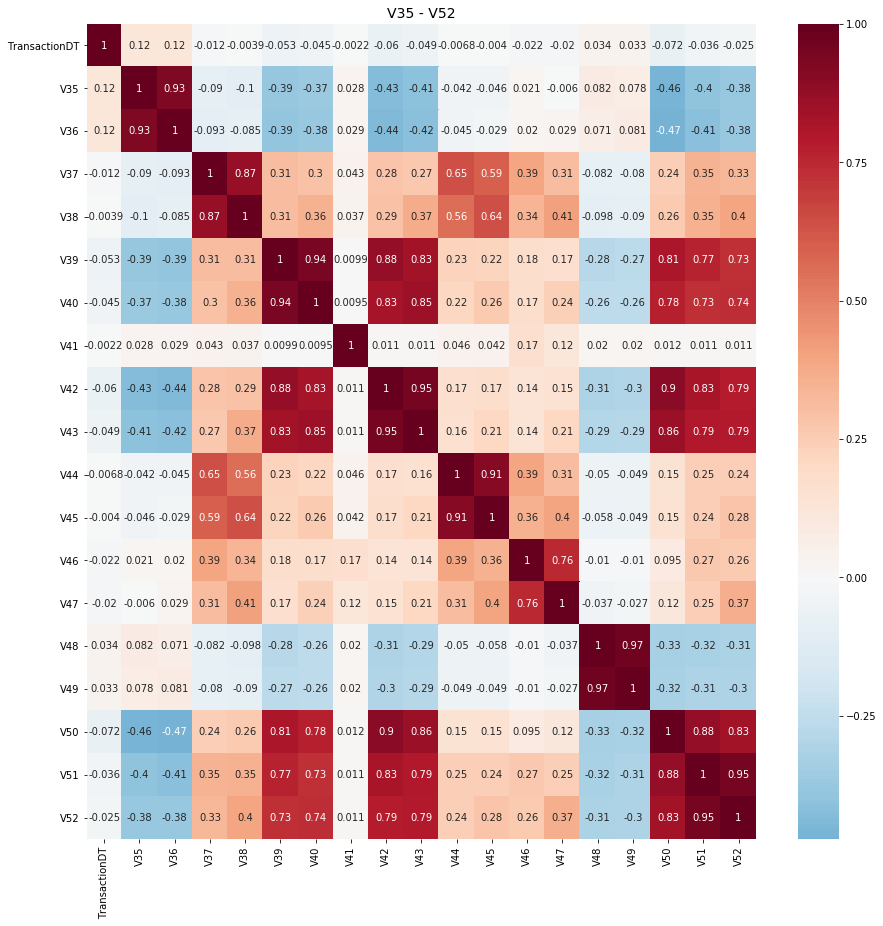

In [13]:
Vs = nans_groups[168969]
make_plots(Vs)
make_corr(Vs)

In [14]:
grps = [[35,36],[37,38],[39,40,42,43,50,51,52],[41],[44,45],[46,47],[48,49]]
reduce_group(grps)

Use these [36, 37, 40, 41, 44, 47, 48]


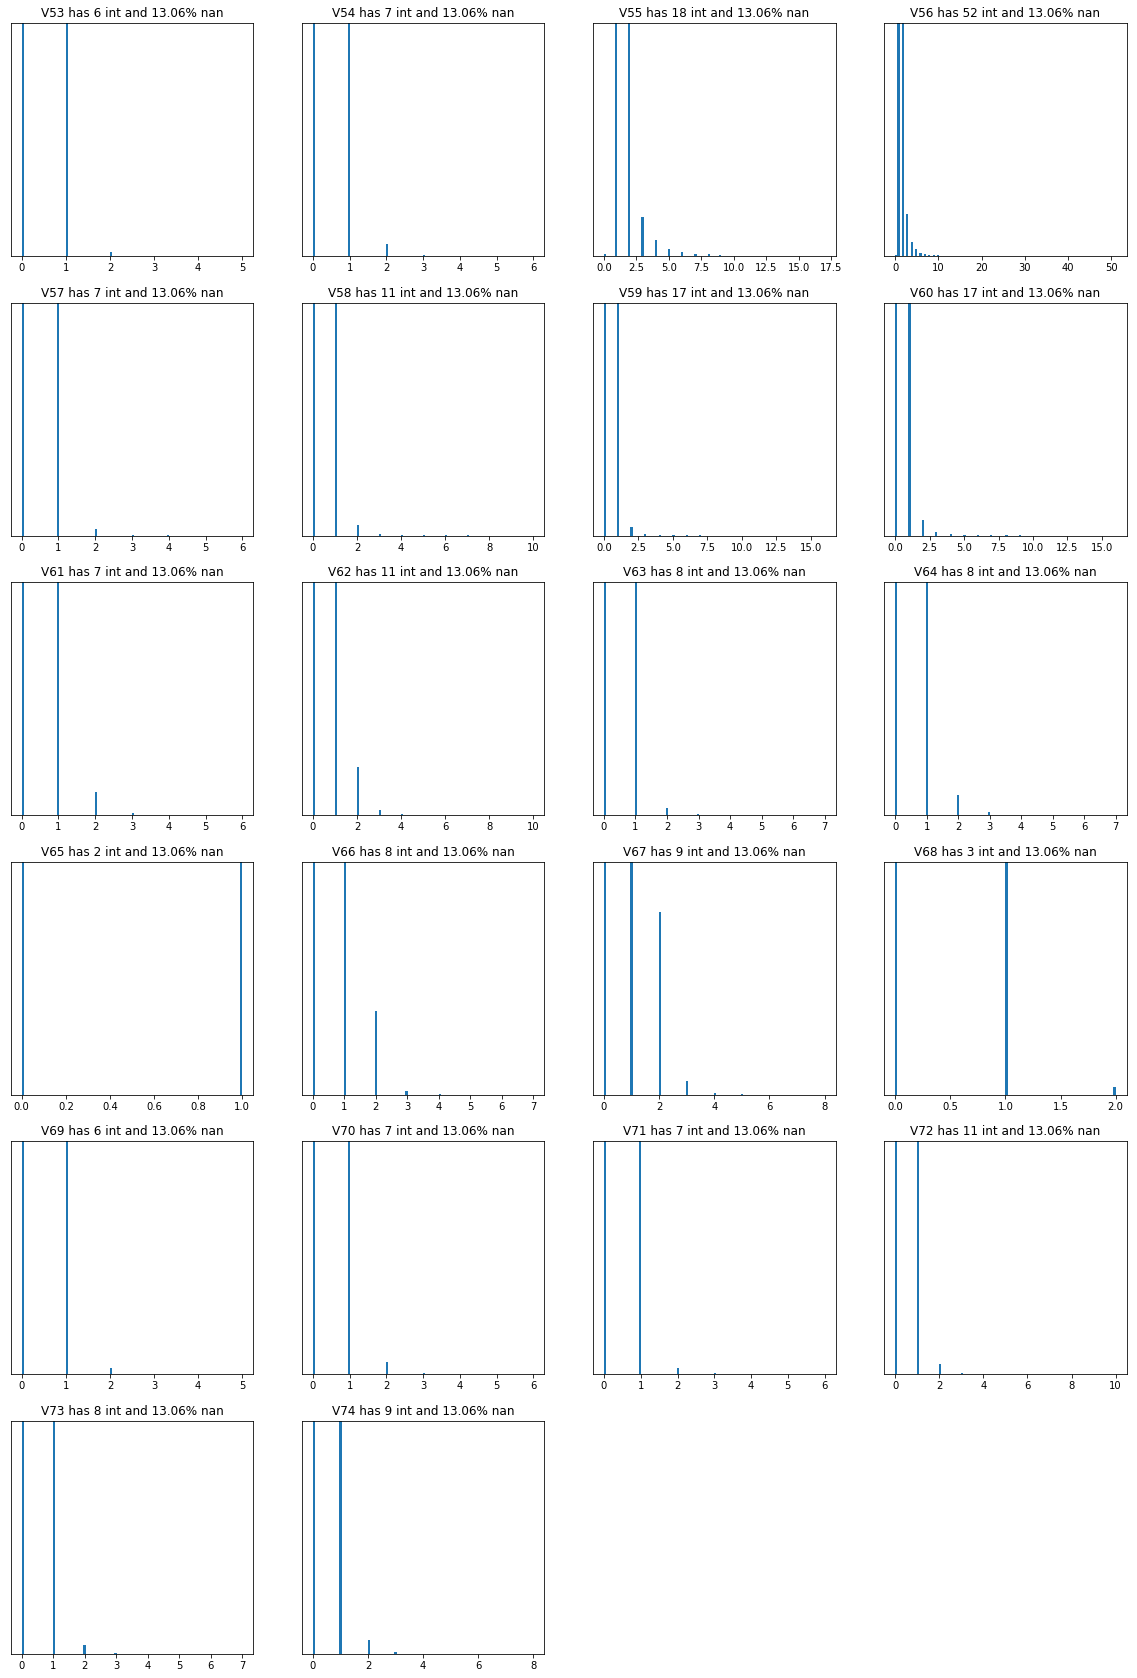

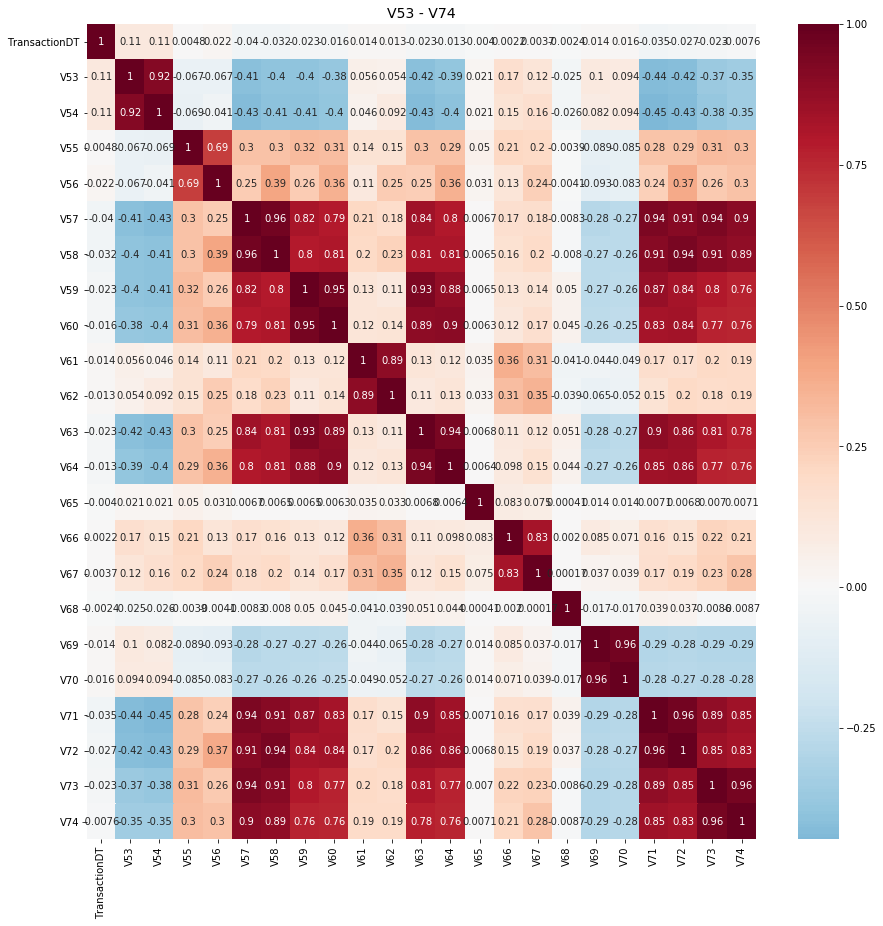

In [15]:
Vs = nans_groups[77096]
make_plots(Vs)
make_corr(Vs)

In [16]:
grps = [[53,54],[55,56],[57,58,59,60,63,64,71,72,73,74],[61,62],[65],[66,67],[68],[69,70]]
reduce_group(grps)

Use these [54, 56, 59, 62, 65, 67, 68, 70]


### V75 - V94

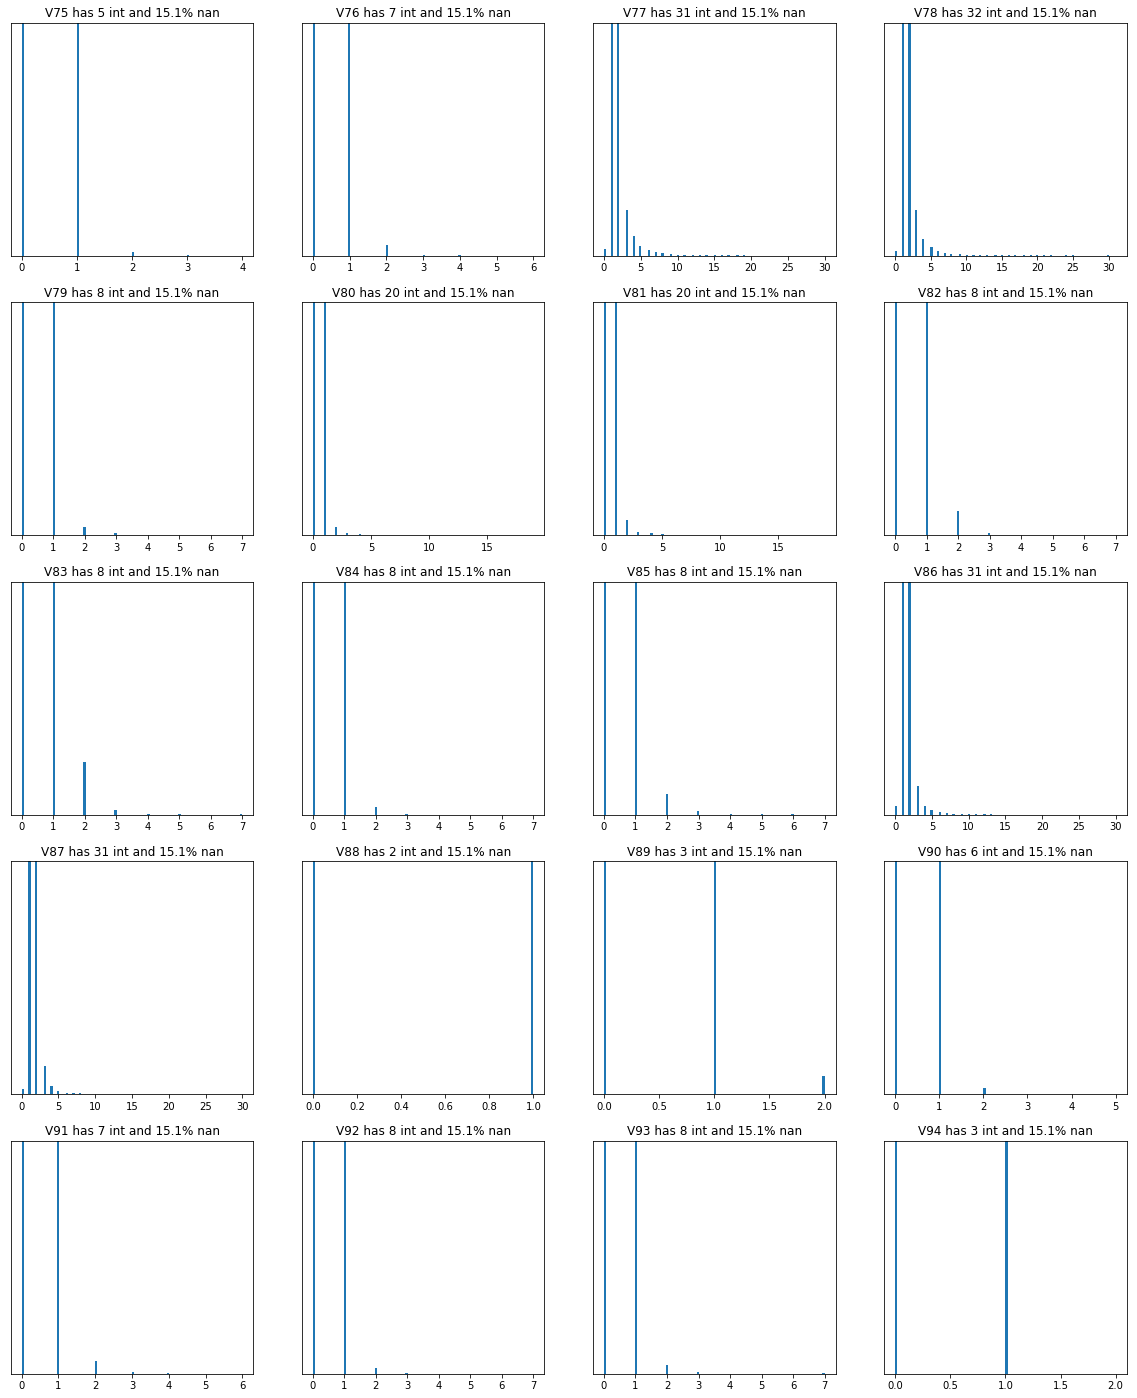

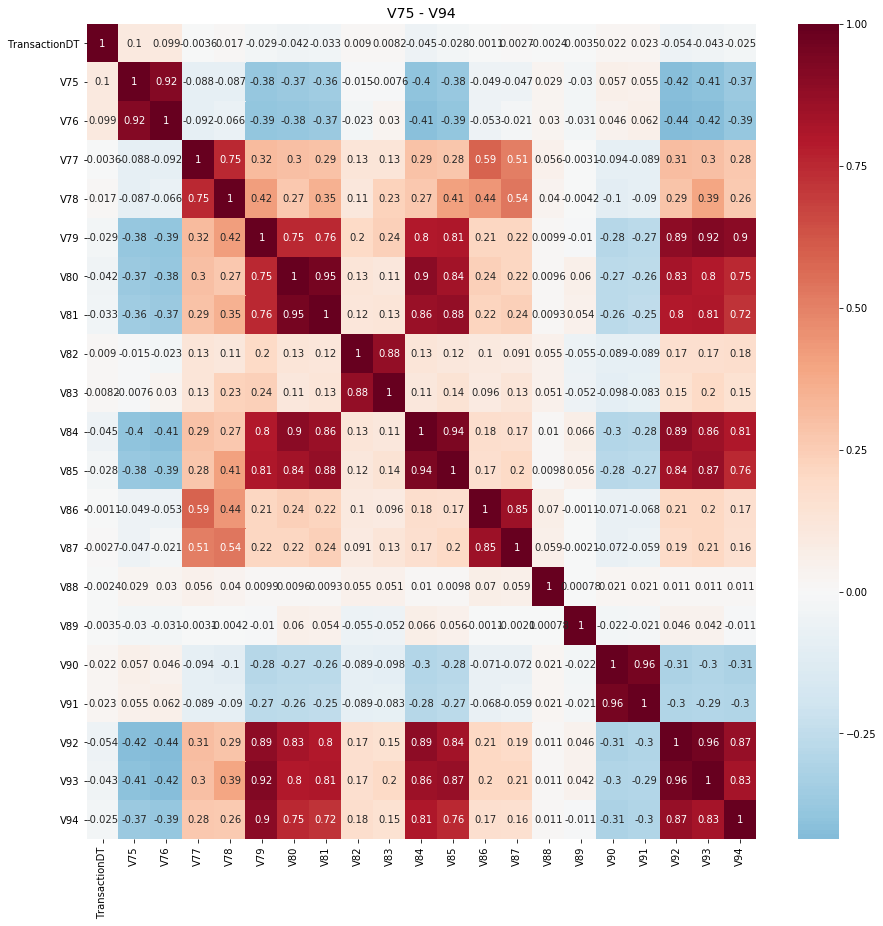

In [17]:
Vs = nans_groups[89164]
make_plots(Vs)
make_corr(Vs)

In [18]:
grps = [[75,76],[77,78],[79,80,81,84,85,92,93,94],[82,83],[86,87],[88],[89],[90,91]]
reduce_group(grps)

Use these [76, 78, 80, 82, 86, 88, 89, 91]


### V95 - V137

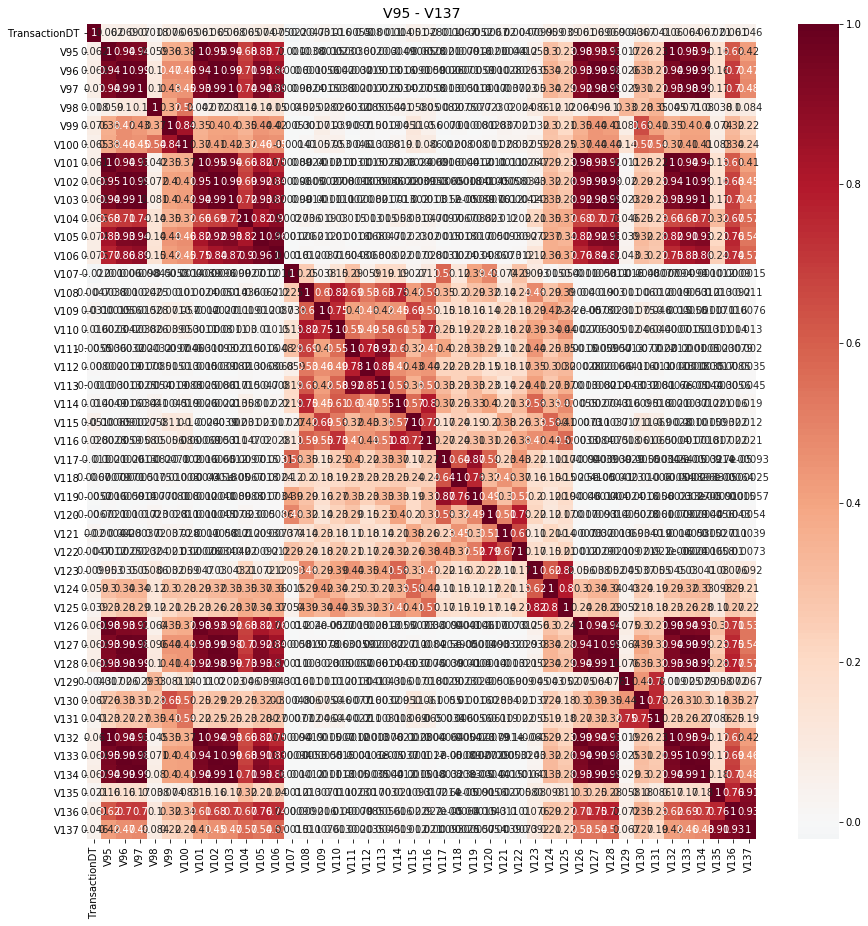

In [19]:
Vs = nans_groups[314]
make_corr(Vs)

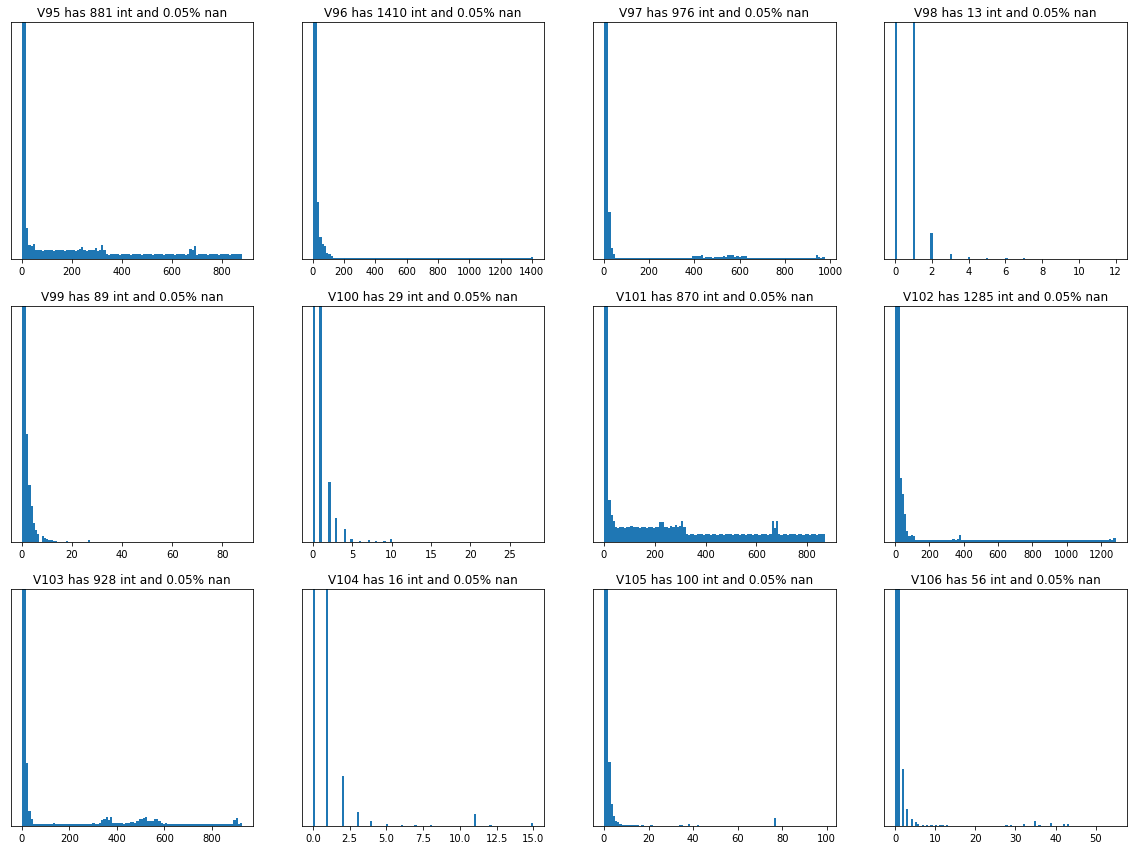

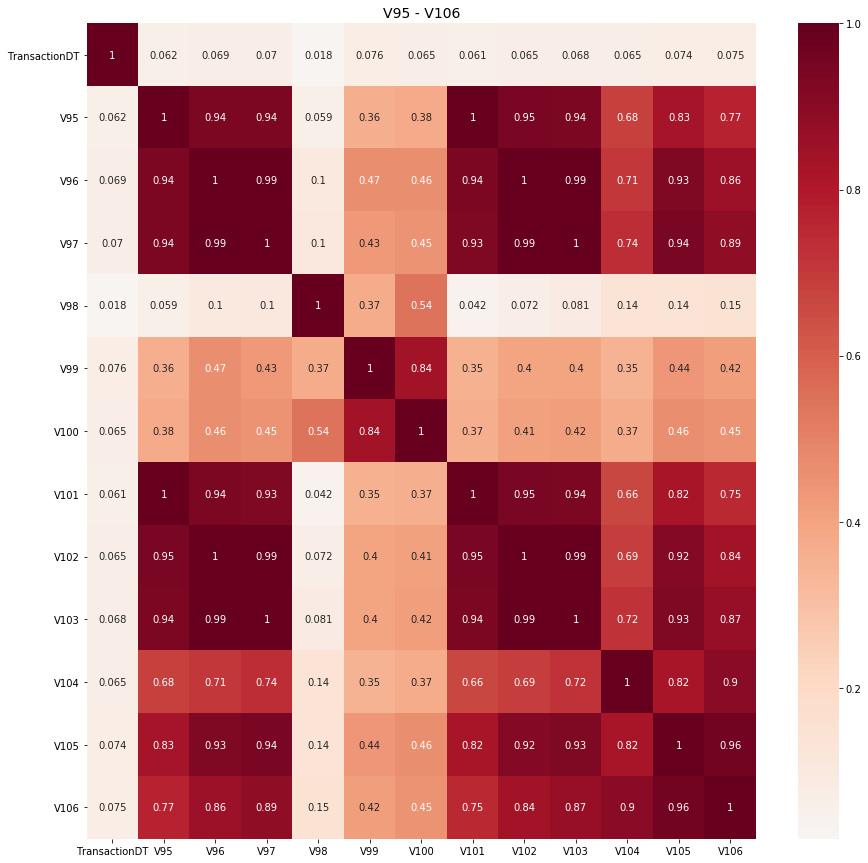

In [20]:
Vs = ['V'+str(x) for x in range(95,107)]
make_plots(Vs)
make_corr(Vs)

In [21]:
grps = [[95,96,97,101,102,103,105,106],[98],[99,100],[104]]
reduce_group(grps)

Use these [96, 98, 99, 104]


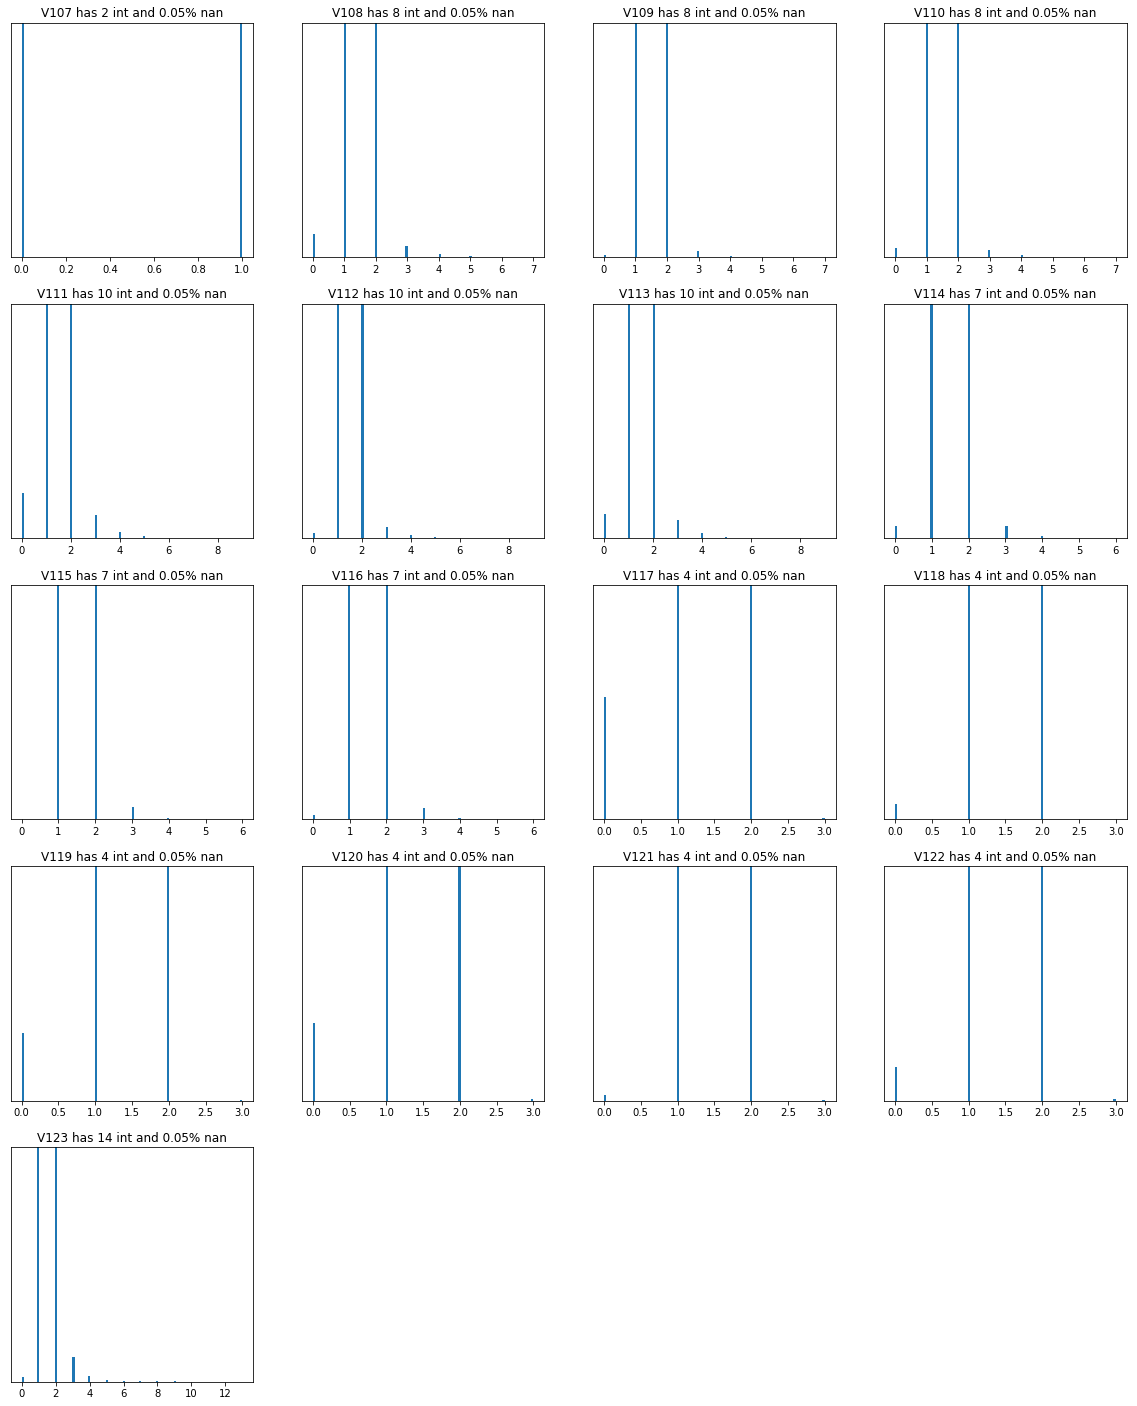

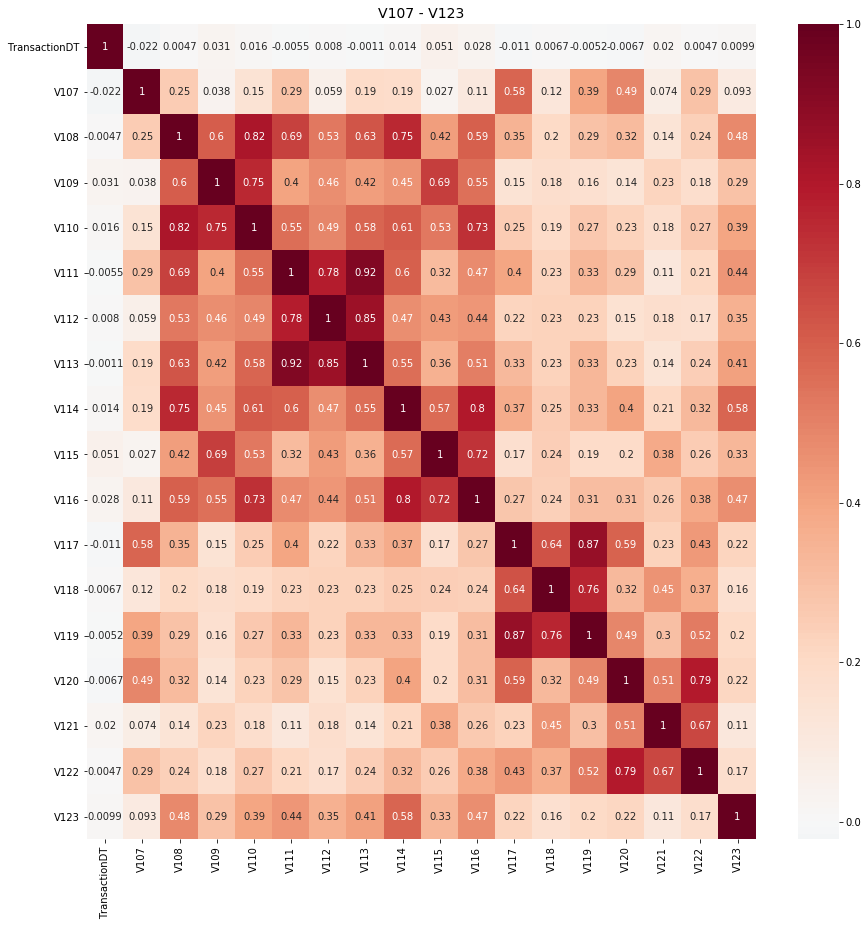

In [22]:
Vs = ['V'+str(x) for x in range(107,124)]
make_plots(Vs)
make_corr(Vs)

In [23]:
grps = [[107],[108,109,110,114],[111,112,113],[115,116],[117,118,119],[120,122],[121],[123]]
reduce_group(grps)

Use these [107, 108, 111, 115, 117, 120, 121, 123]


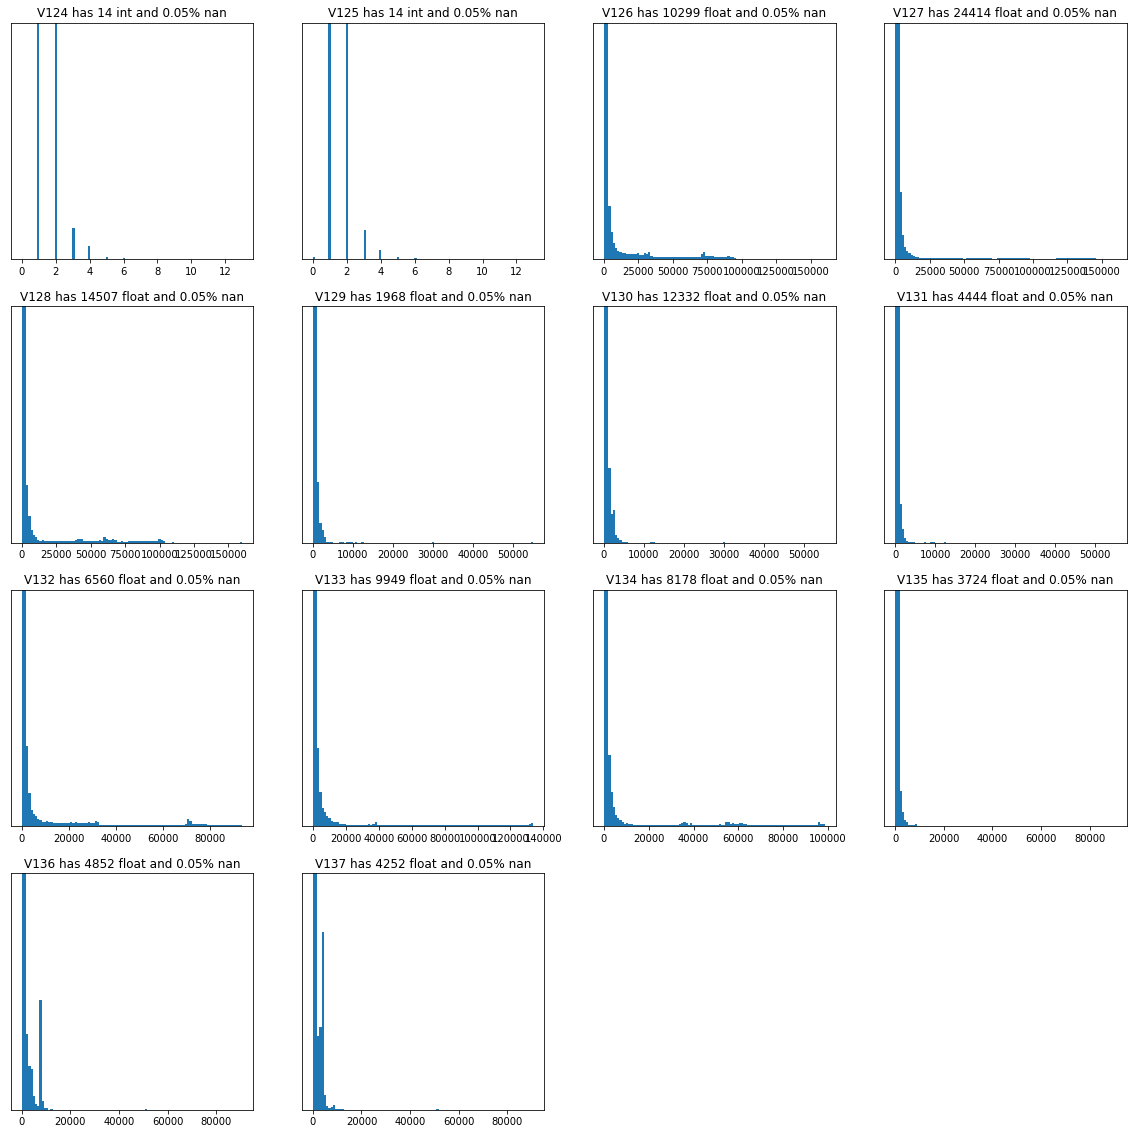

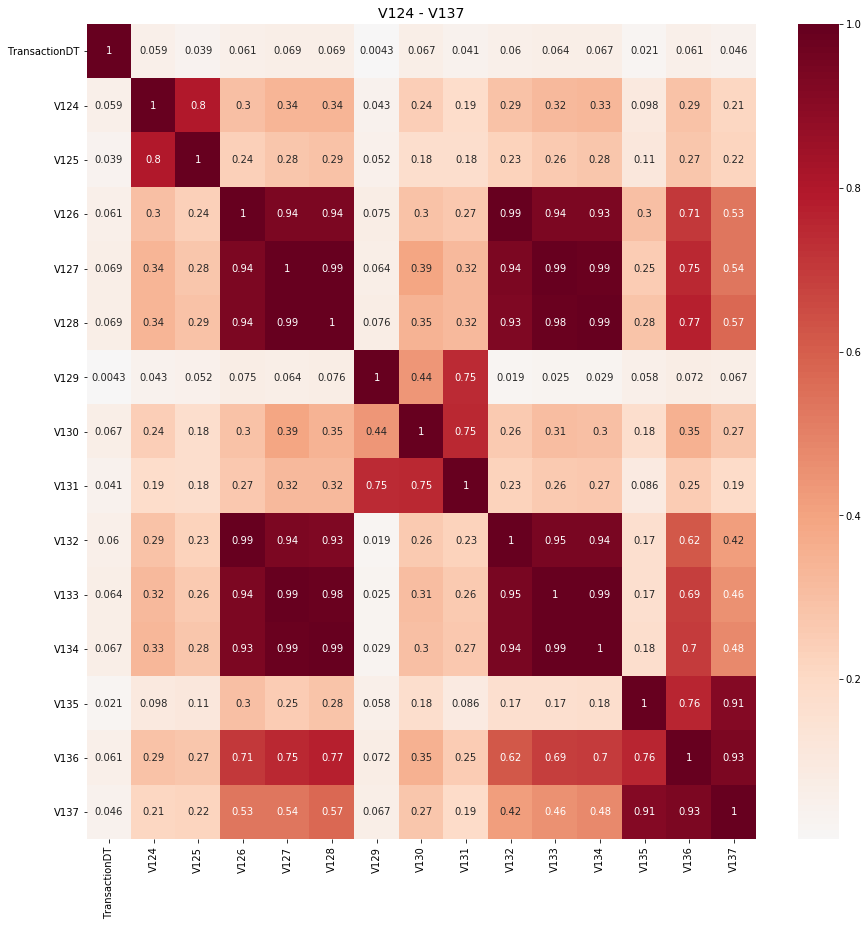

In [24]:
Vs = ['V'+str(x) for x in range(124,138)]
make_plots(Vs)
make_corr(Vs)

In [25]:
grps = [[124,125],[126,127,128,132,133,134],[129],[130,131],[135,136,137]]
reduce_group(grps)

Use these [124, 127, 129, 130, 136]


### V138 ~ V163

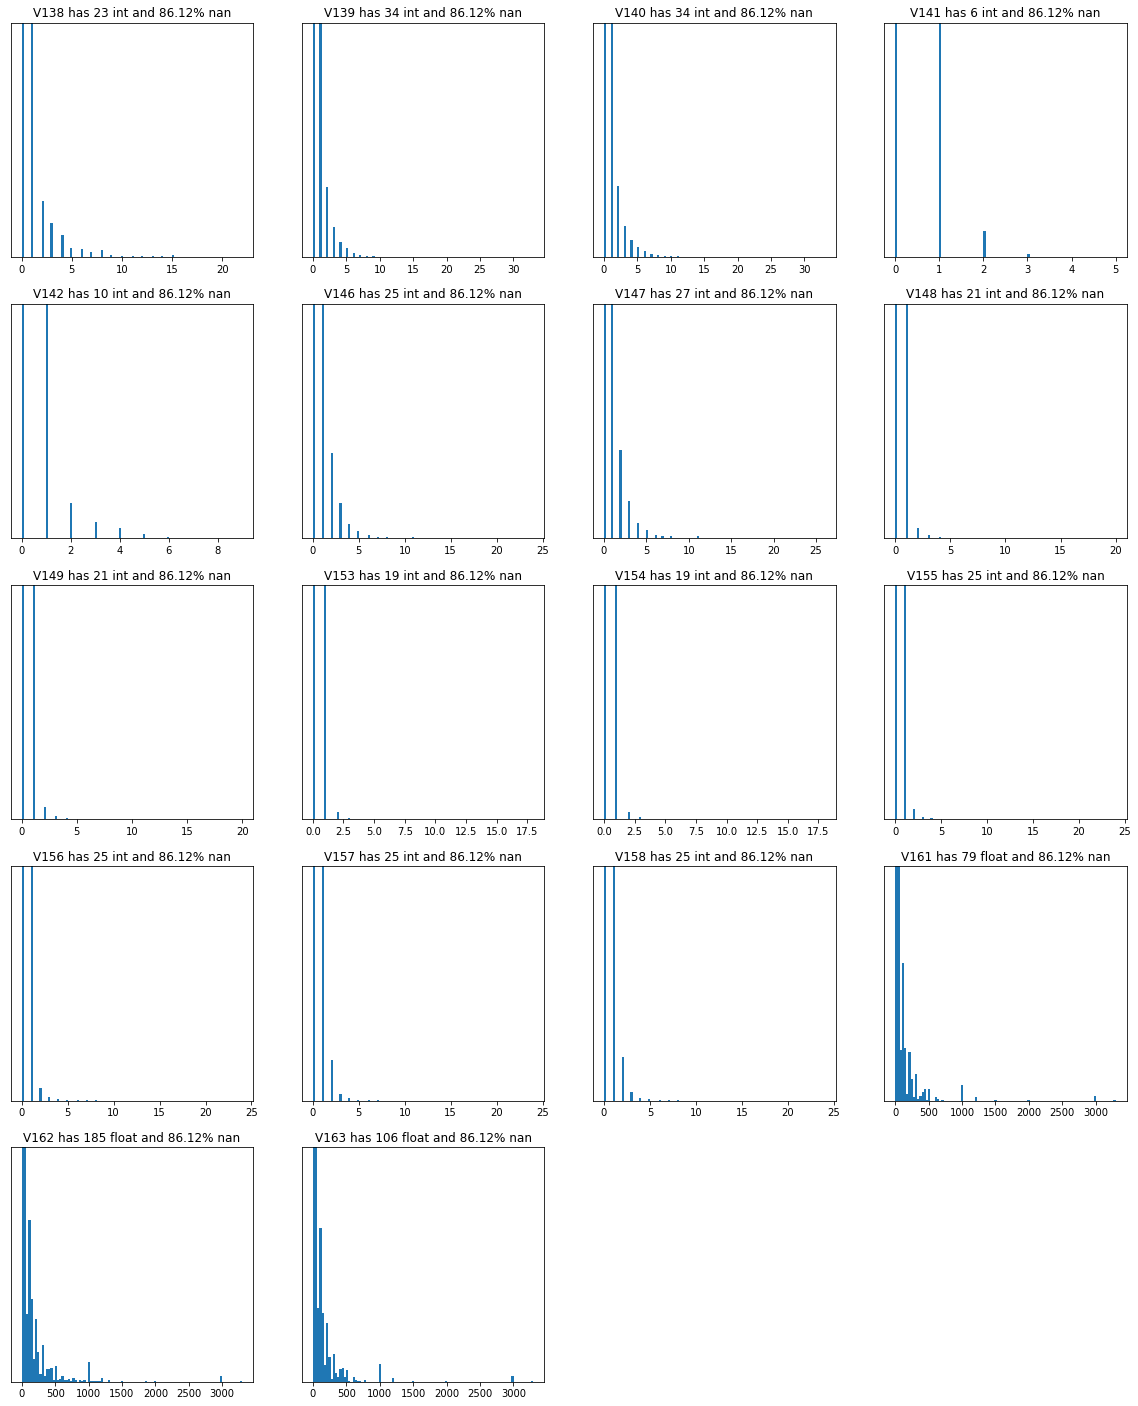

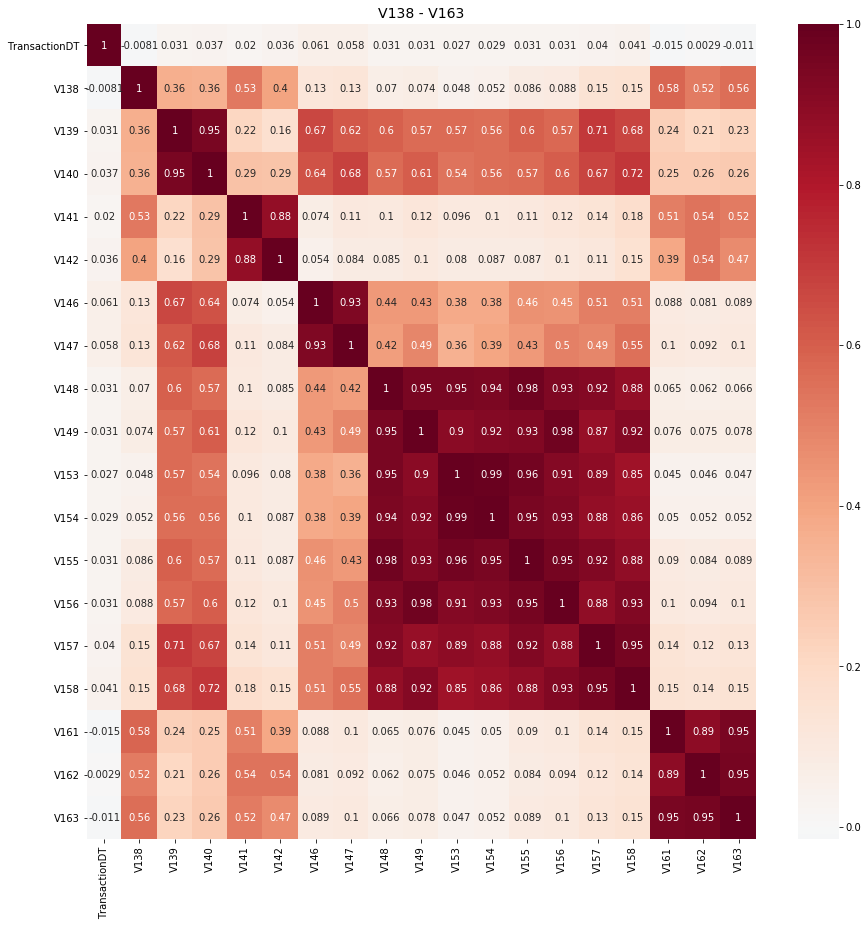

In [26]:
Vs = nans_groups[508595]
make_plots(Vs)
make_corr(Vs)

In [27]:
grps = [[138],[139,140],[141,142],[146,147],[148,149,153,154,156,157,158],[161,162,163]]
reduce_group(grps)

Use these [138, 139, 142, 147, 156, 162]


### V143 ~ V166

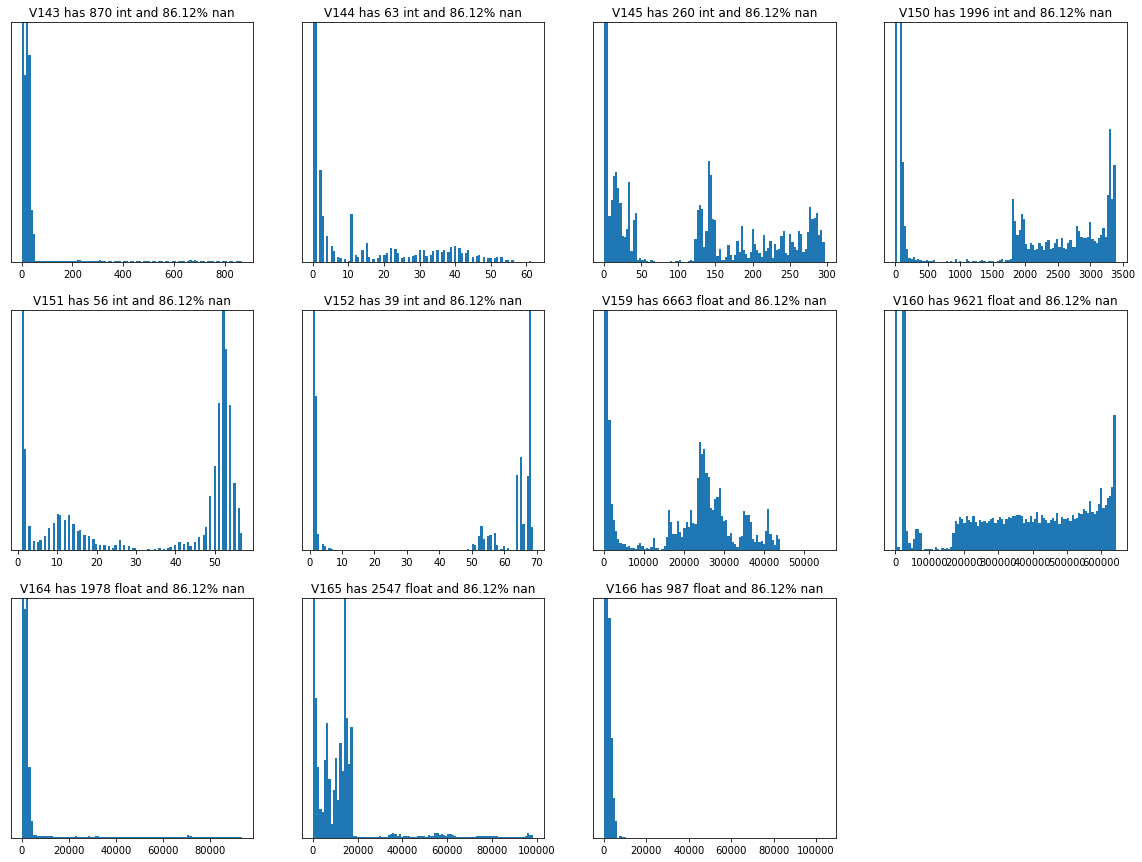

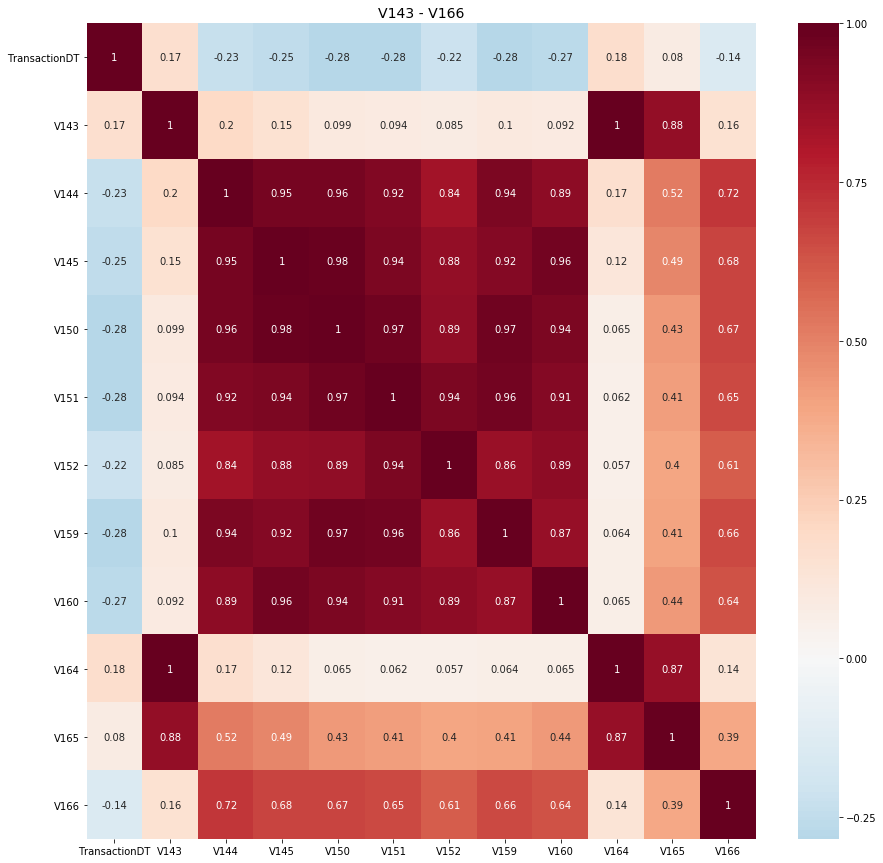

In [28]:
Vs = nans_groups[508589]
make_plots(Vs)
make_corr(Vs)

In [29]:
grps = [[143,164,165],[144,145,150,151,152,159,160],[166]]
reduce_group(grps)

Use these [165, 160, 166]


### V167 ~ V216

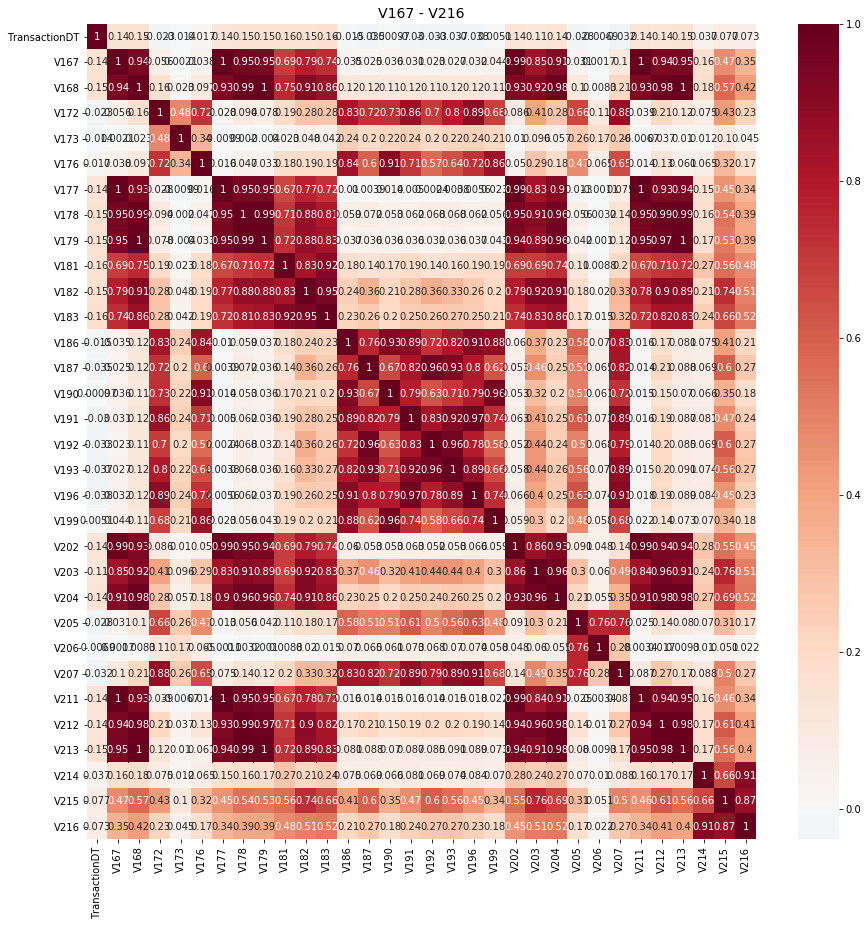

In [30]:
Vs = [x for x in nans_groups[450909]]
make_corr(Vs)

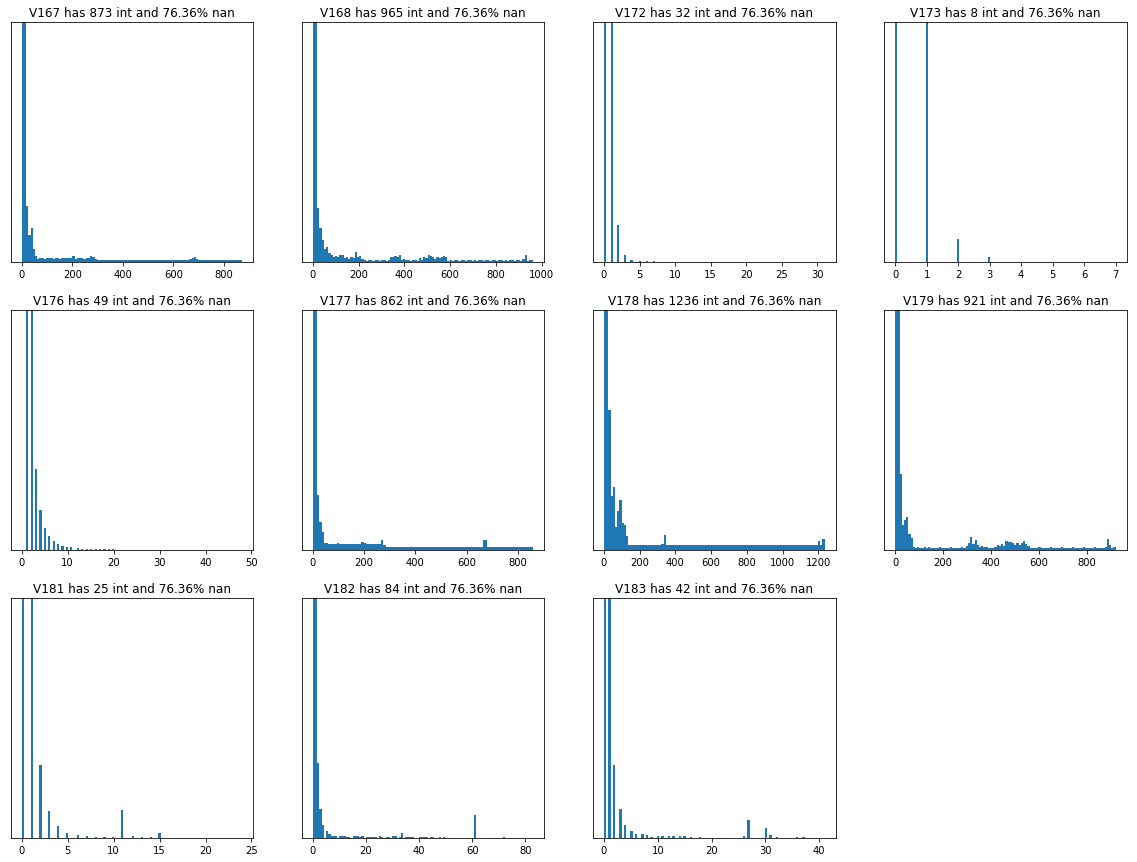

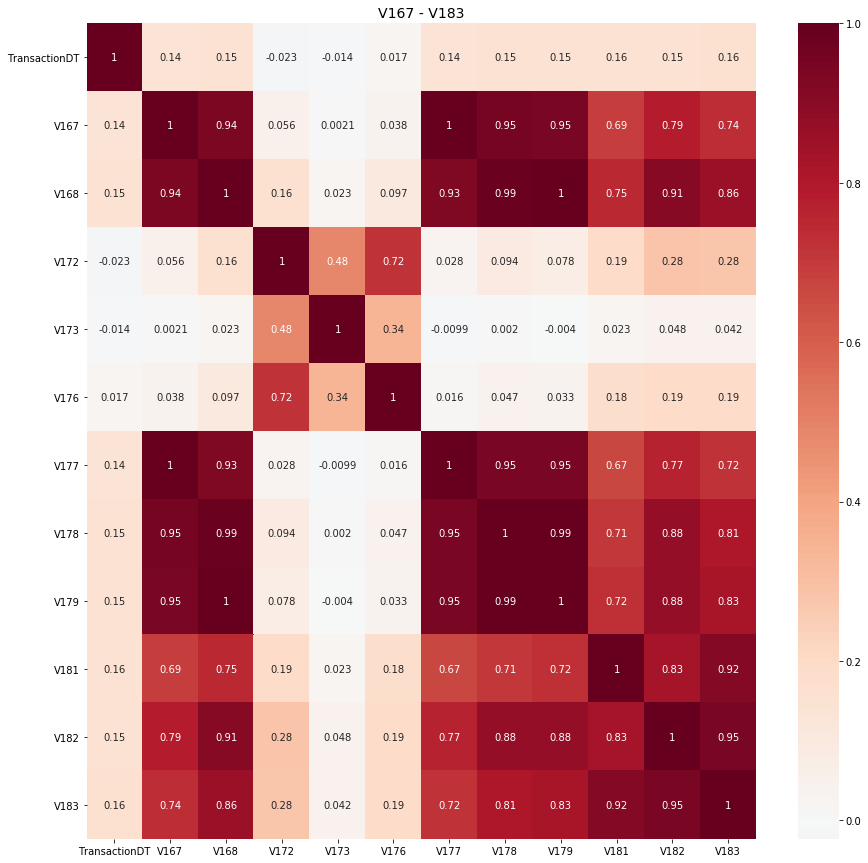

In [31]:
Vs = [x for x in nans_groups[450909] if int(x[1:])<186]
make_plots(Vs)
make_corr(Vs)

In [32]:
grps = [[167,168,177,178,179],[172,176],[173],[181,182,183]]
reduce_group(grps)

Use these [178, 176, 173, 182]


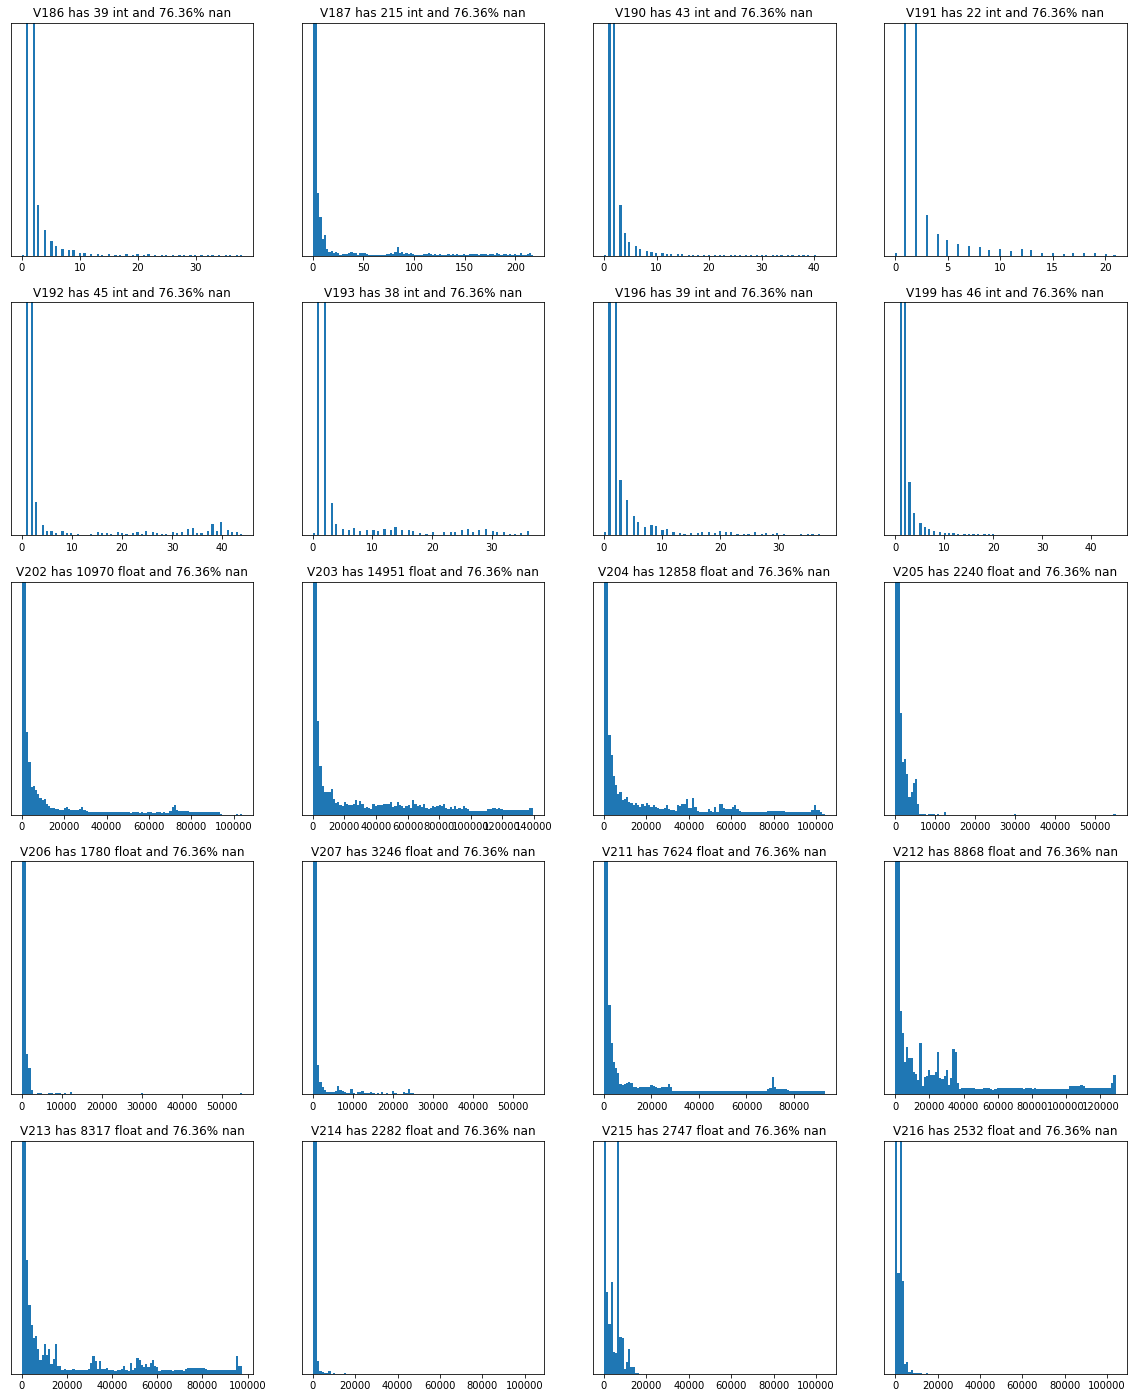

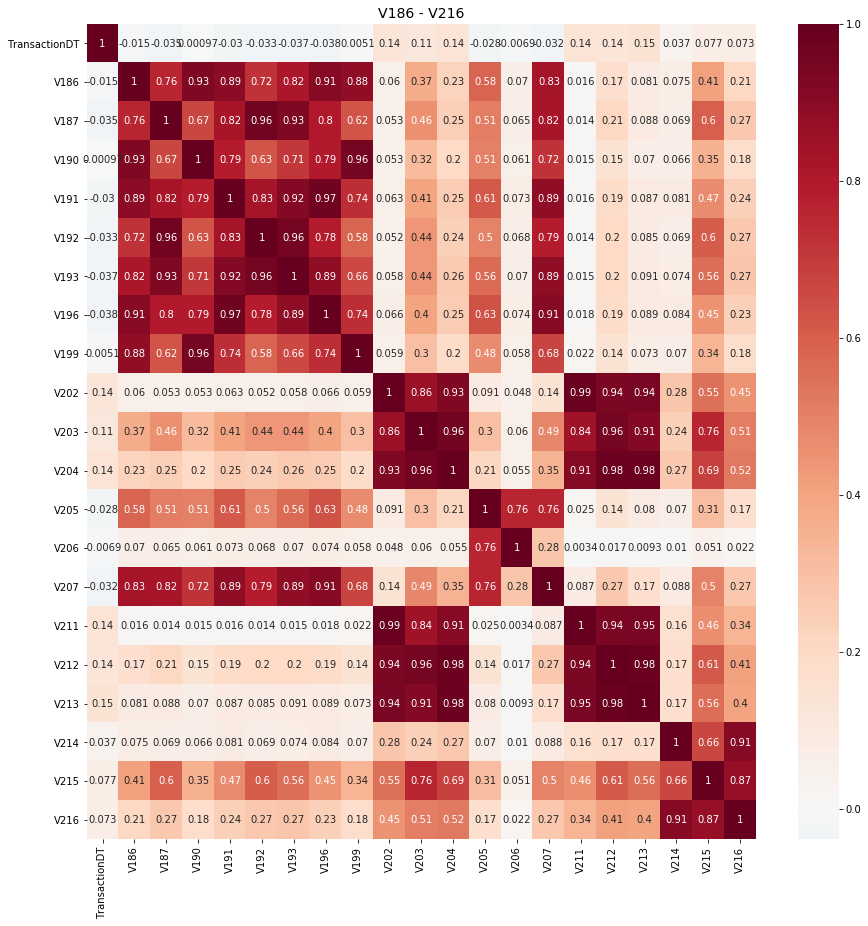

In [33]:
Vs = [x for x in nans_groups[450909] if (int(x[1:])>183)]
make_plots(Vs)
make_corr(Vs)

In [34]:
grps = [[186,187,190,191,192,193,196,199],[202,203,204,211,212,213],[205,206],[207],[214,215,216]]
reduce_group(grps)

Use these [187, 203, 205, 207, 215]


### V169 ~ V210

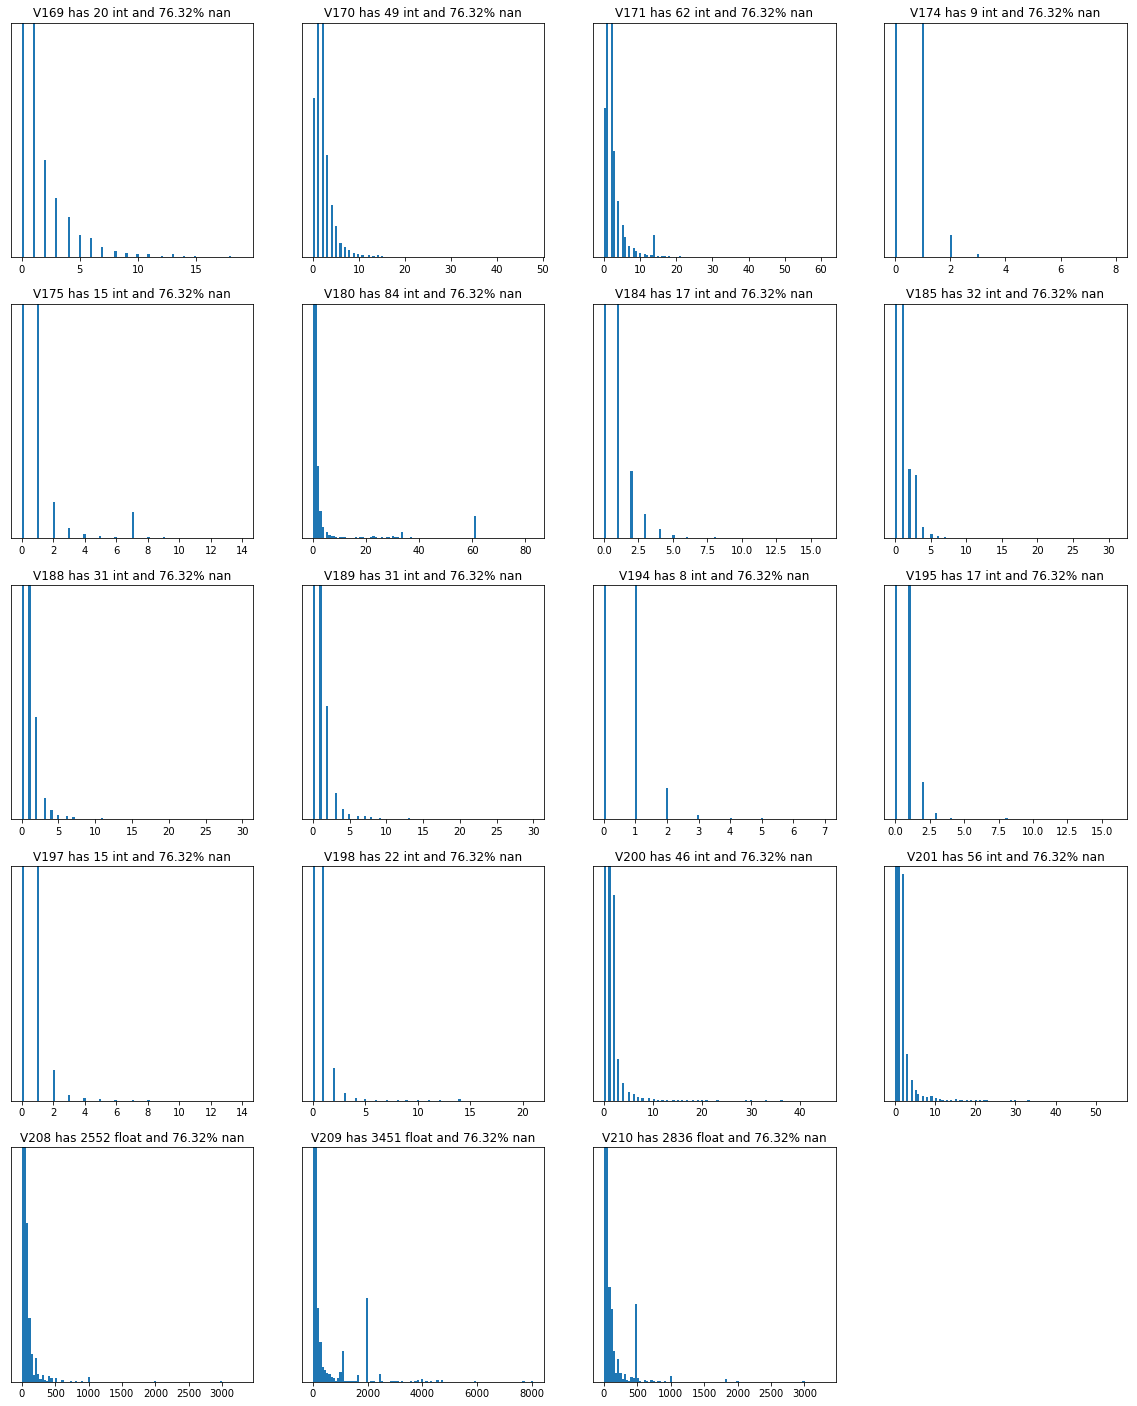

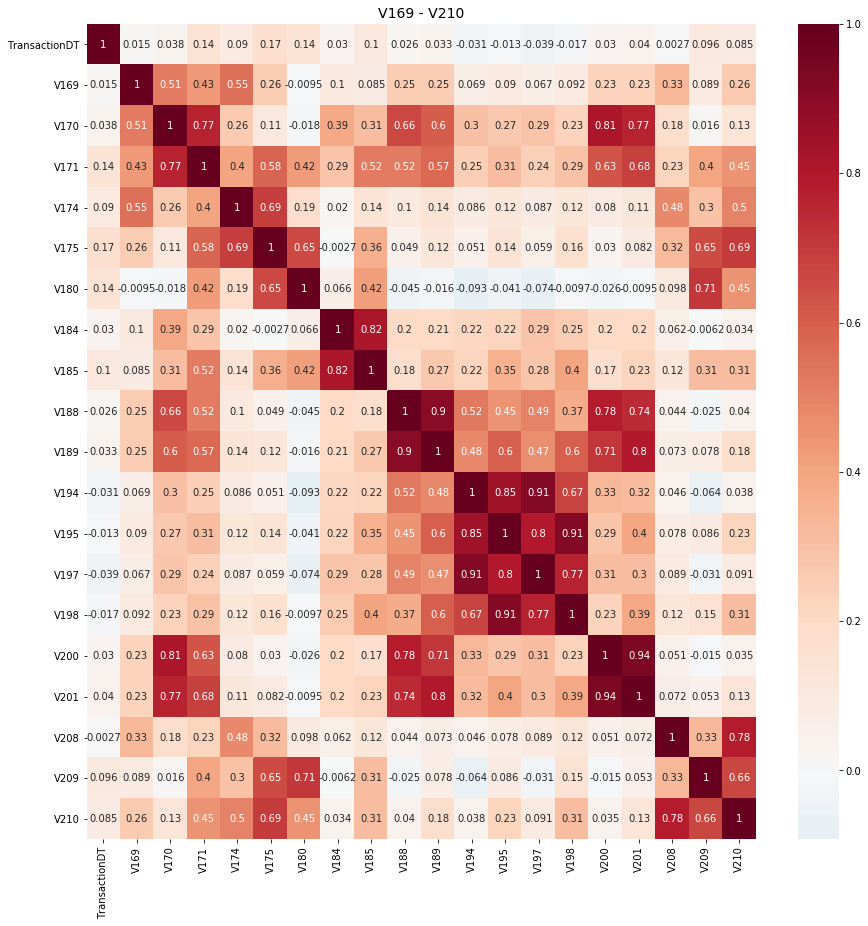

In [35]:
Vs = nans_groups[450721]
make_plots(Vs)
make_corr(Vs)

In [36]:
grps = [[169],[170,171,200,201],[174,175],[180],[184,185],[188,189],[194,195,197,198],[208,210],[209]]
reduce_group(grps)

Use these [169, 171, 175, 180, 185, 188, 198, 210, 209]


### V217 ~ V278

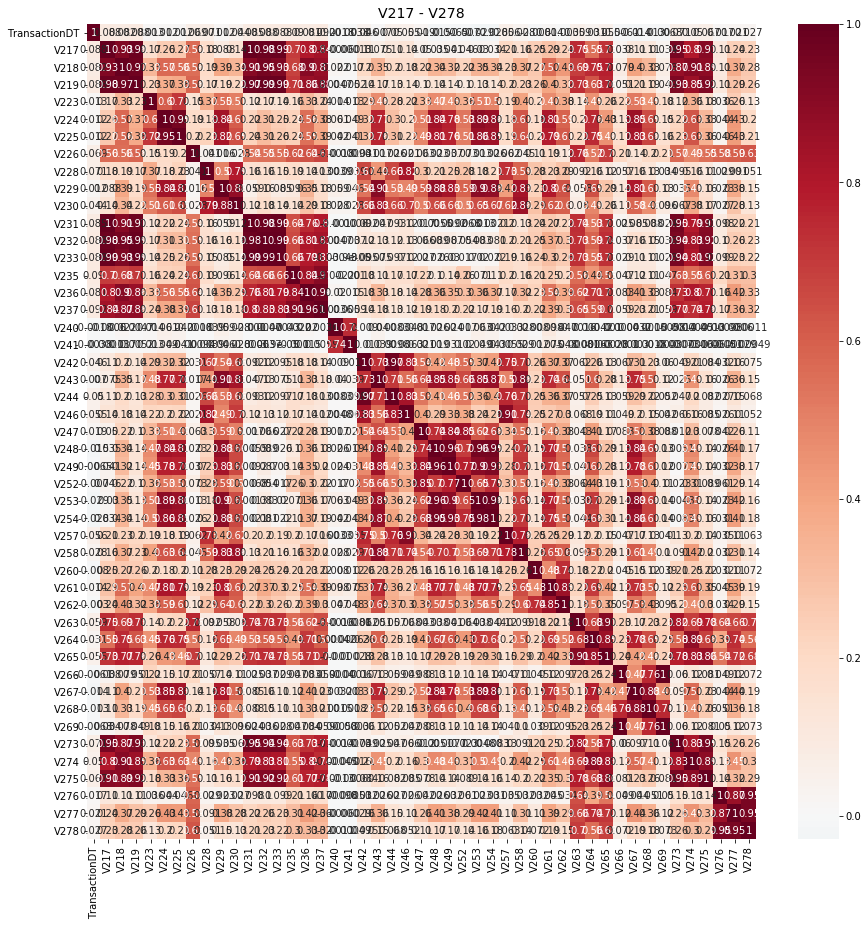

In [37]:
Vs = [x for x in nans_groups[460110]]
make_corr(Vs)

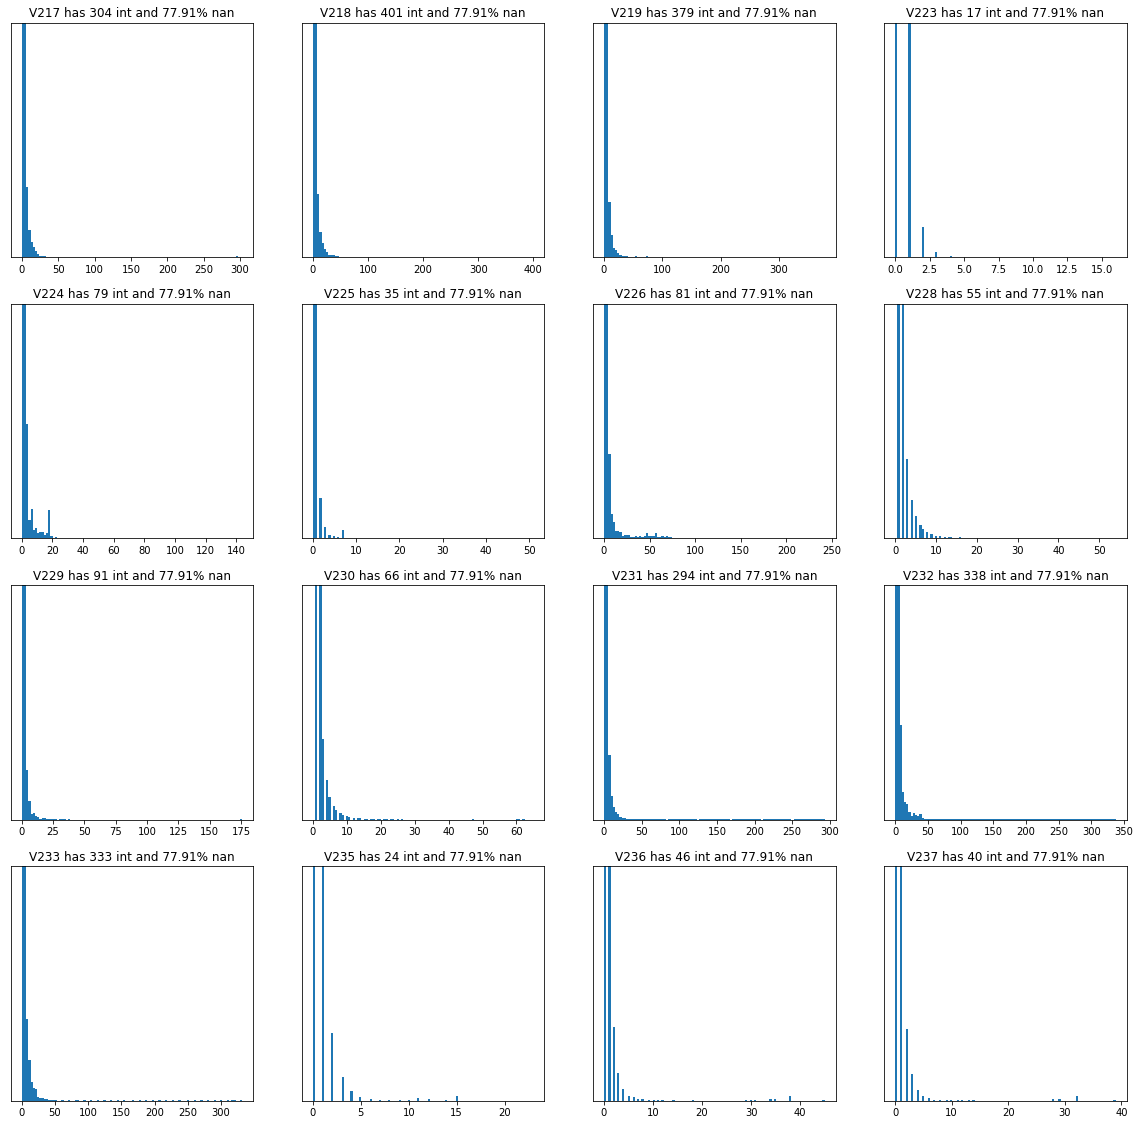

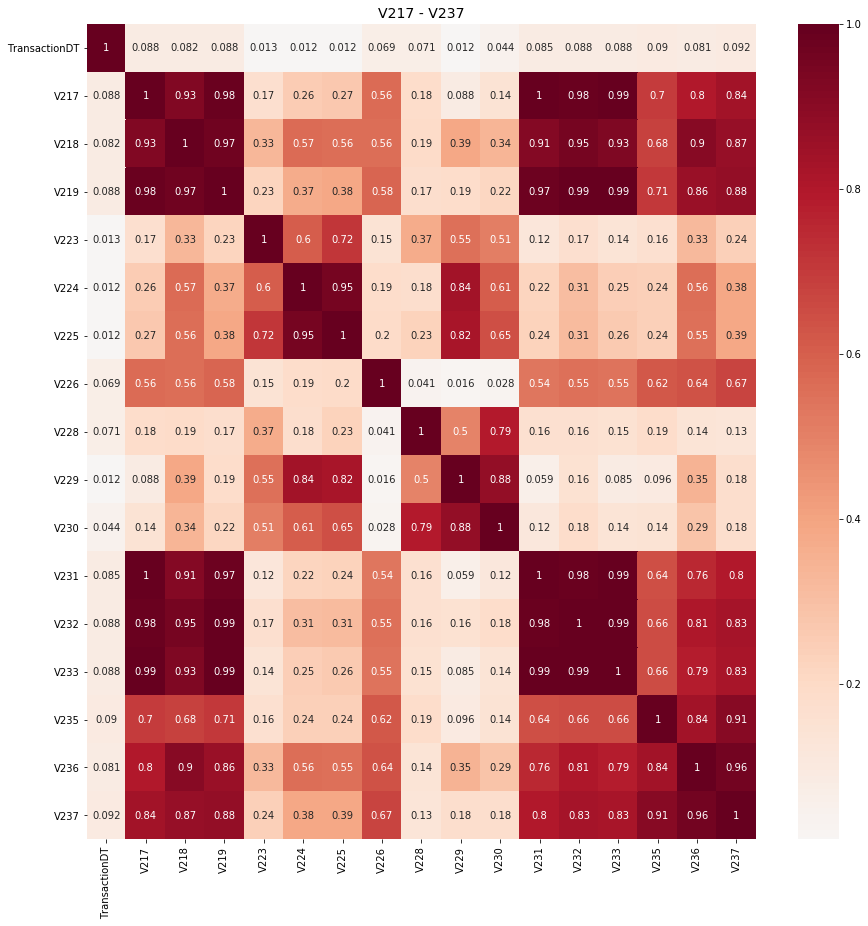

In [38]:
Vs = [x for x in nans_groups[460110] if int(x[1:])<240]
make_plots(Vs)
make_corr(Vs)

In [39]:
grps = [[217,218,219,231,232,233,236,237],[223],[224,225],[226],[228],[229,230],[235]]
reduce_group(grps)

Use these [218, 223, 224, 226, 228, 229, 235]


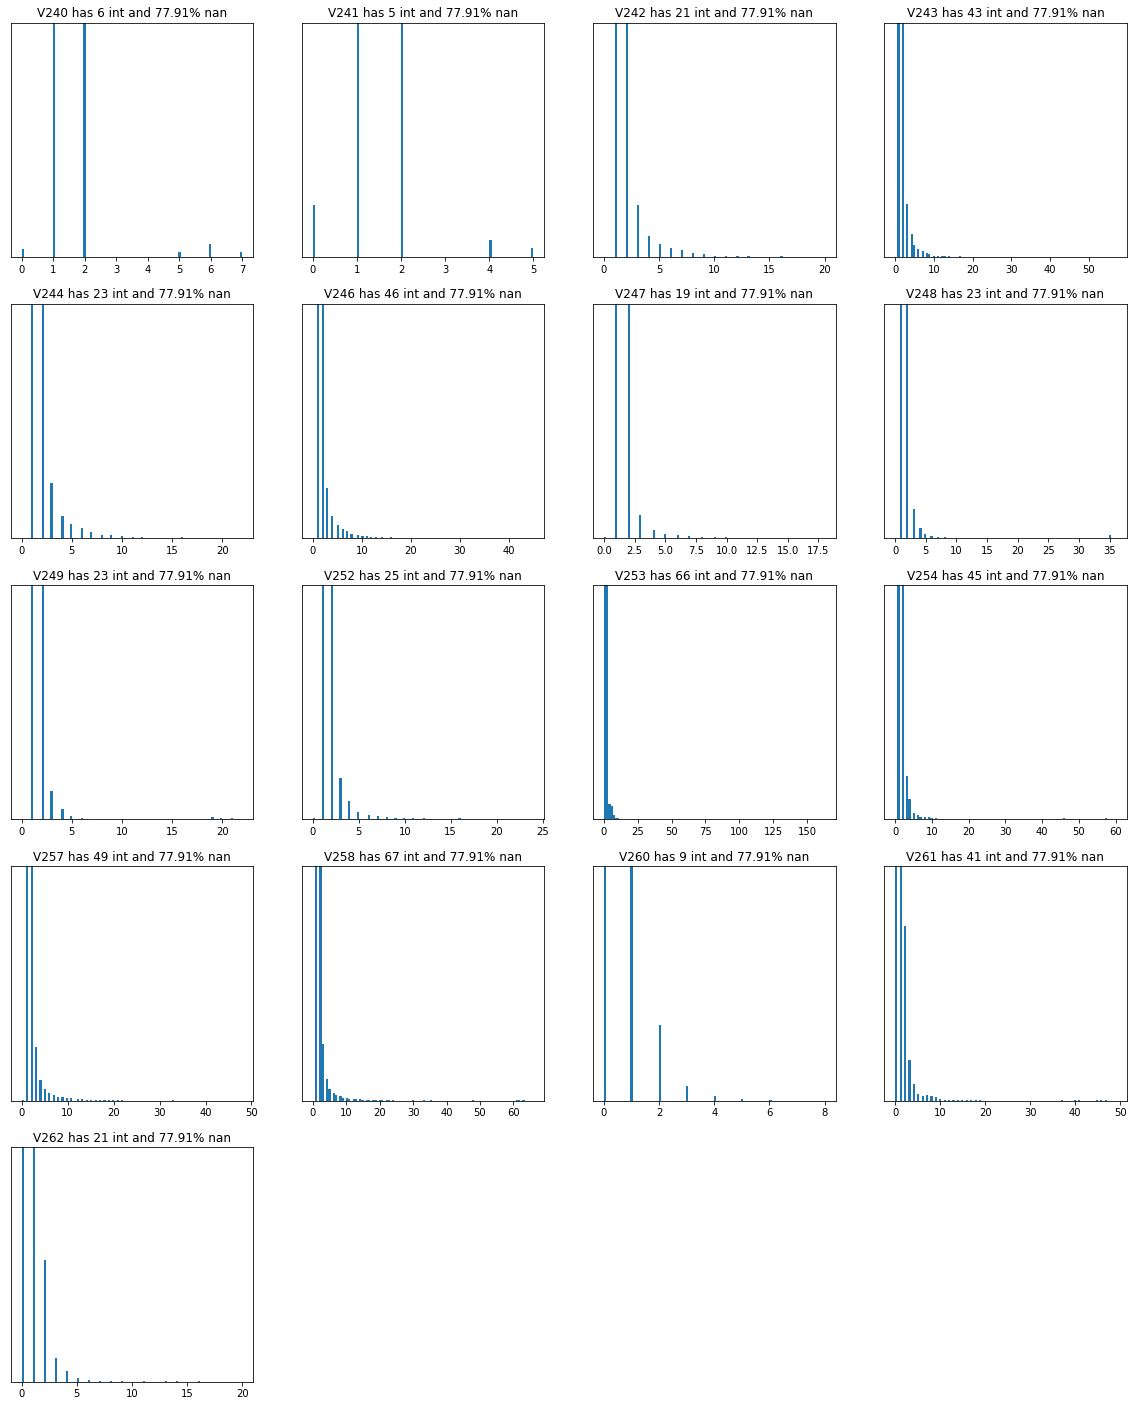

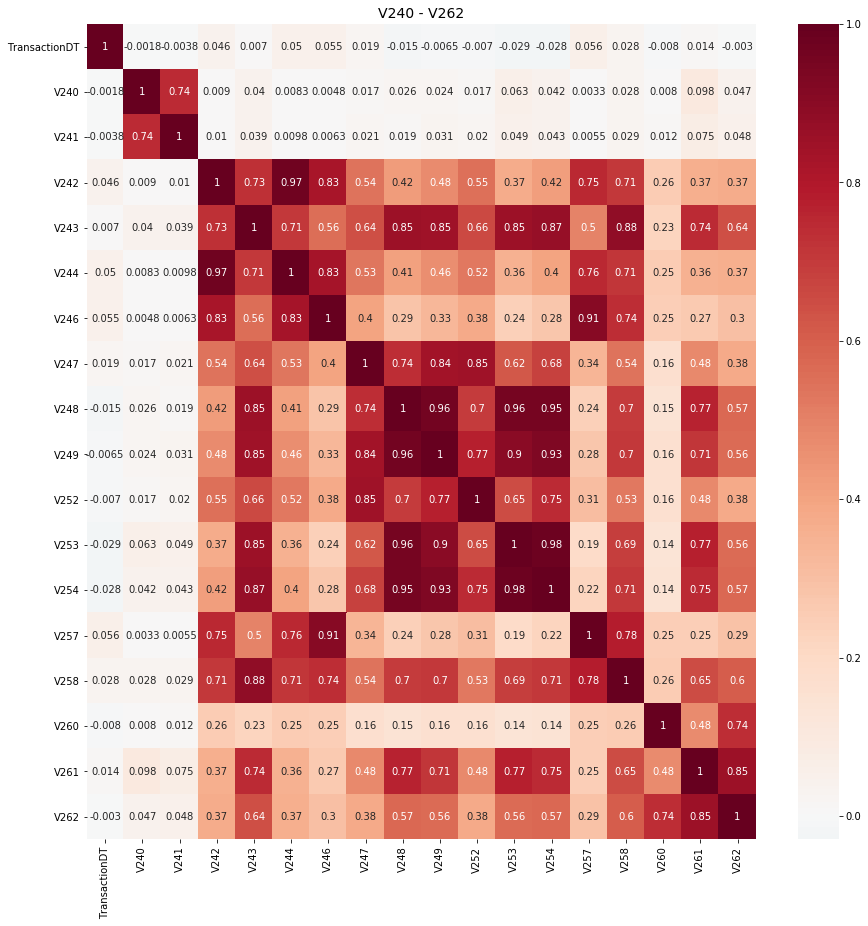

In [40]:
Vs = [x for x in nans_groups[460110] if (int(x[1:])>237)&(int(x[1:])<263)]
make_plots(Vs)
make_corr(Vs)

In [41]:
grps = [[240,241],[242,243,244,258],[246,257],[247,248,249,253,254],[252],[260],[261,262]]
reduce_group(grps)

Use these [240, 258, 257, 253, 252, 260, 261]


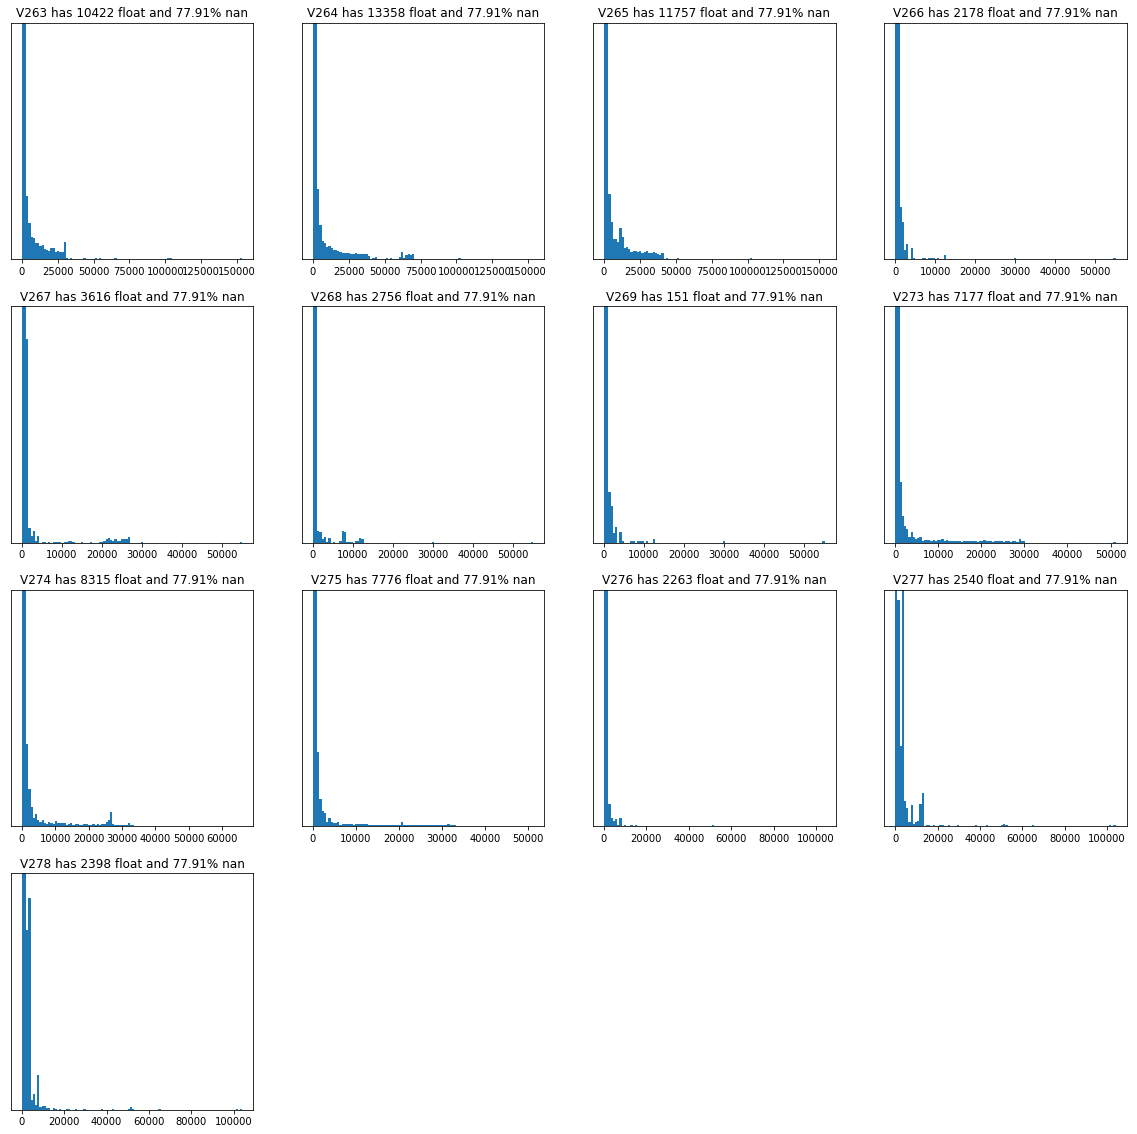

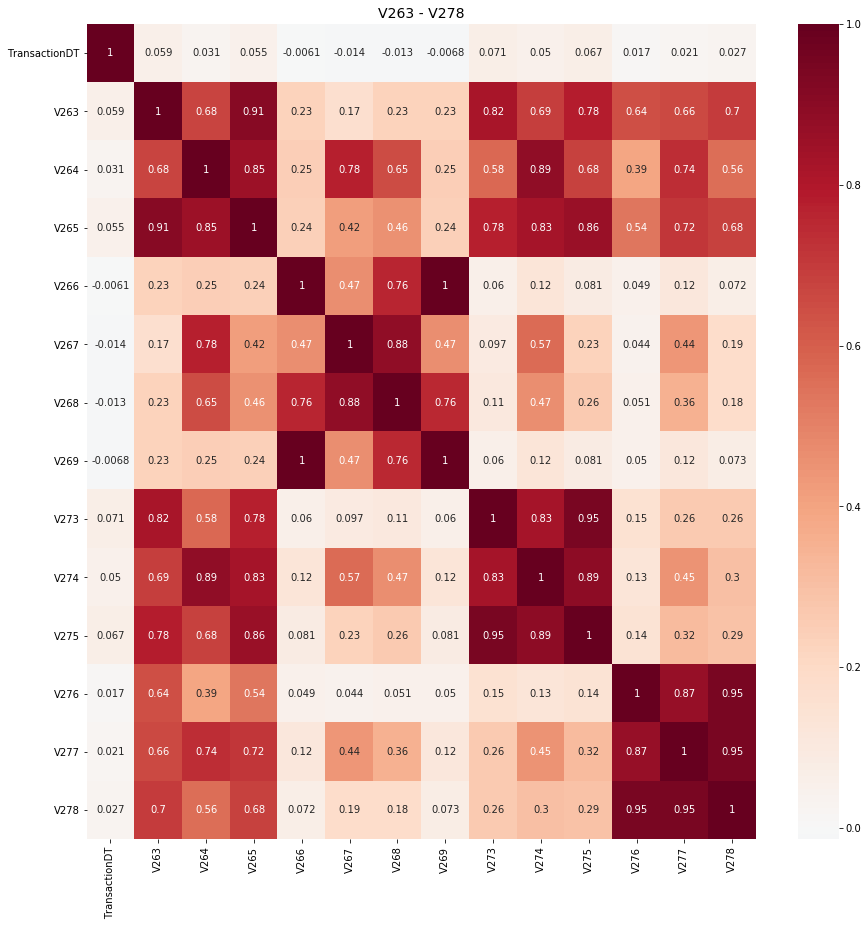

In [42]:
Vs = [x for x in nans_groups[460110] if (int(x[1:])>262)]
make_plots(Vs)
make_corr(Vs)

In [43]:
grps = [[263,265,264],[266,269],[267,268],[273,274,275],[276,277,278]]
reduce_group(grps)

Use these [264, 266, 267, 274, 277]


### V220 ~ V272

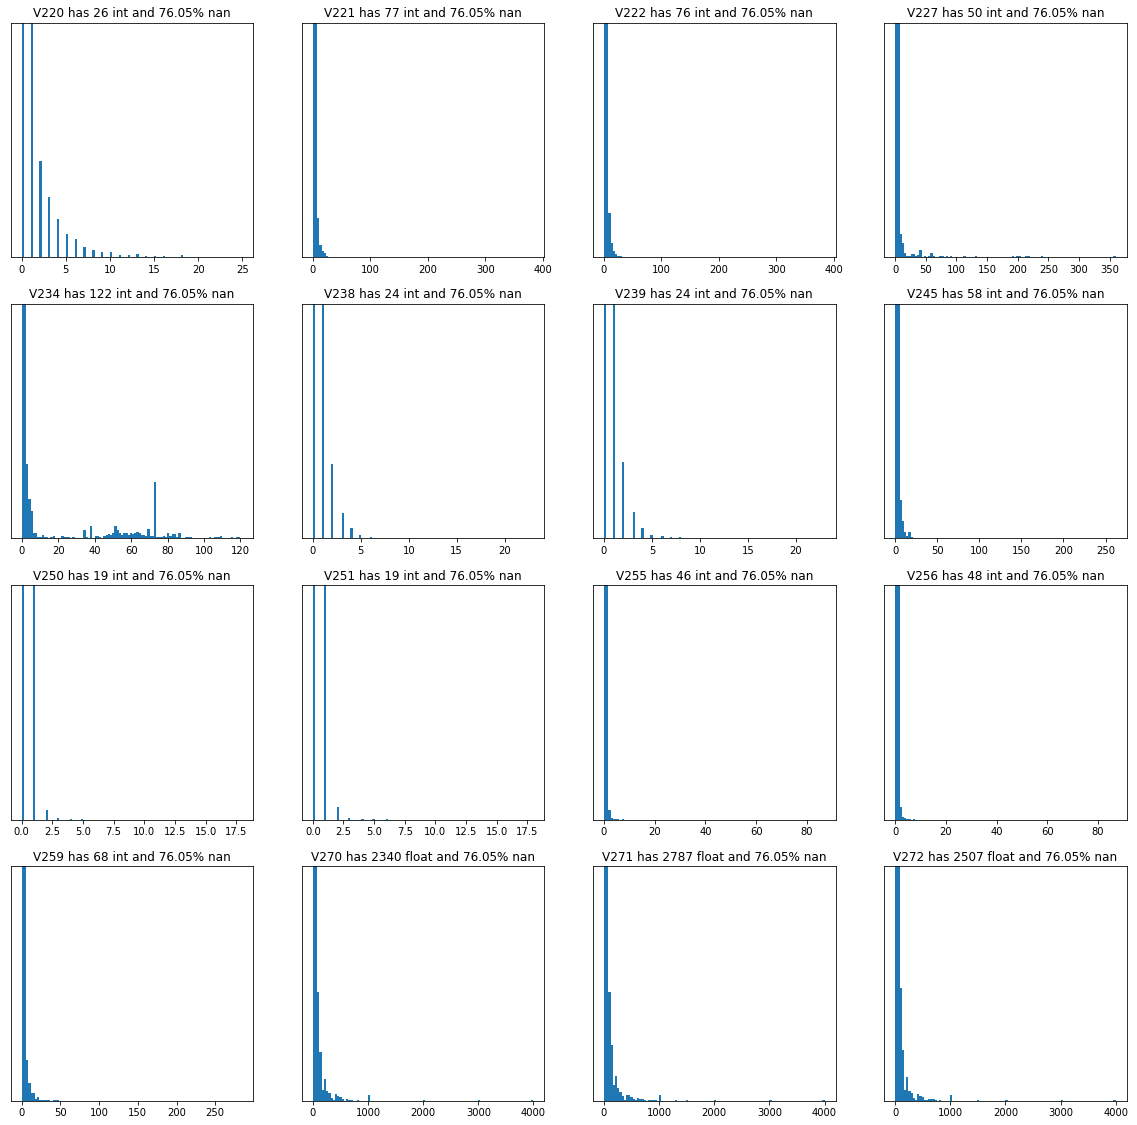

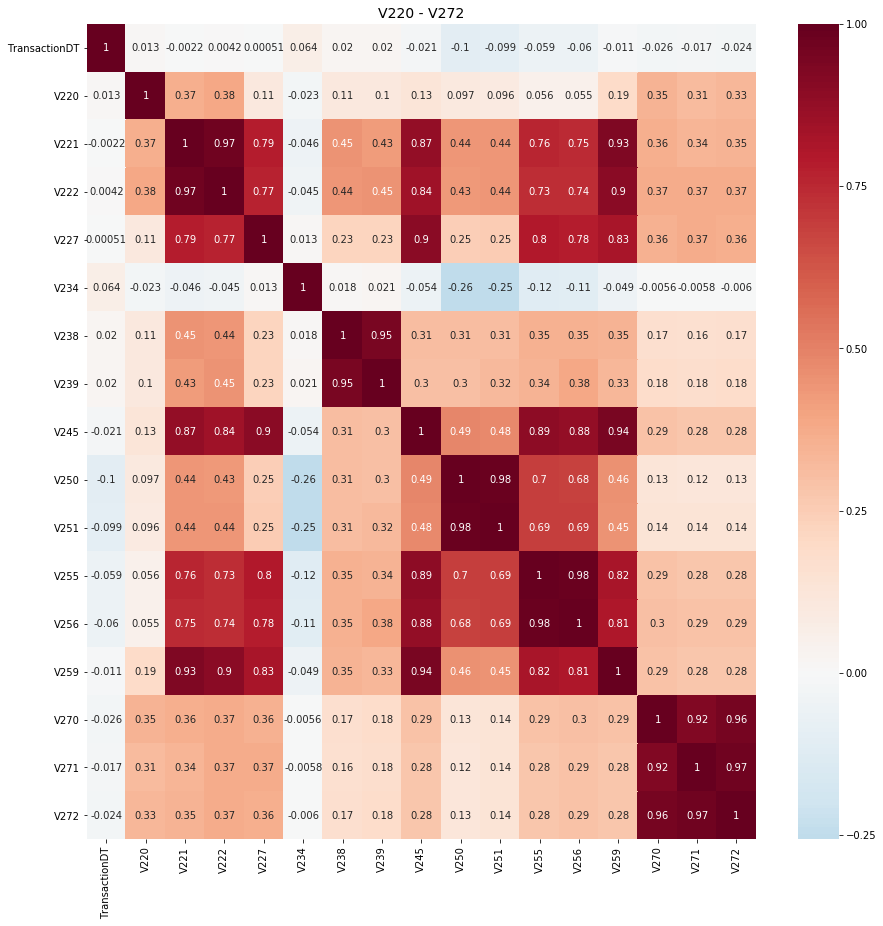

In [44]:
Vs = nans_groups[449124]
make_plots(Vs)
make_corr(Vs)

In [45]:
grps = [[220],[221,222,227,245,255,256,259],[234],[238,239],[250,251],[270,271,272]]
reduce_group(grps)

Use these [220, 221, 234, 238, 250, 271]


### V279 ~ V321

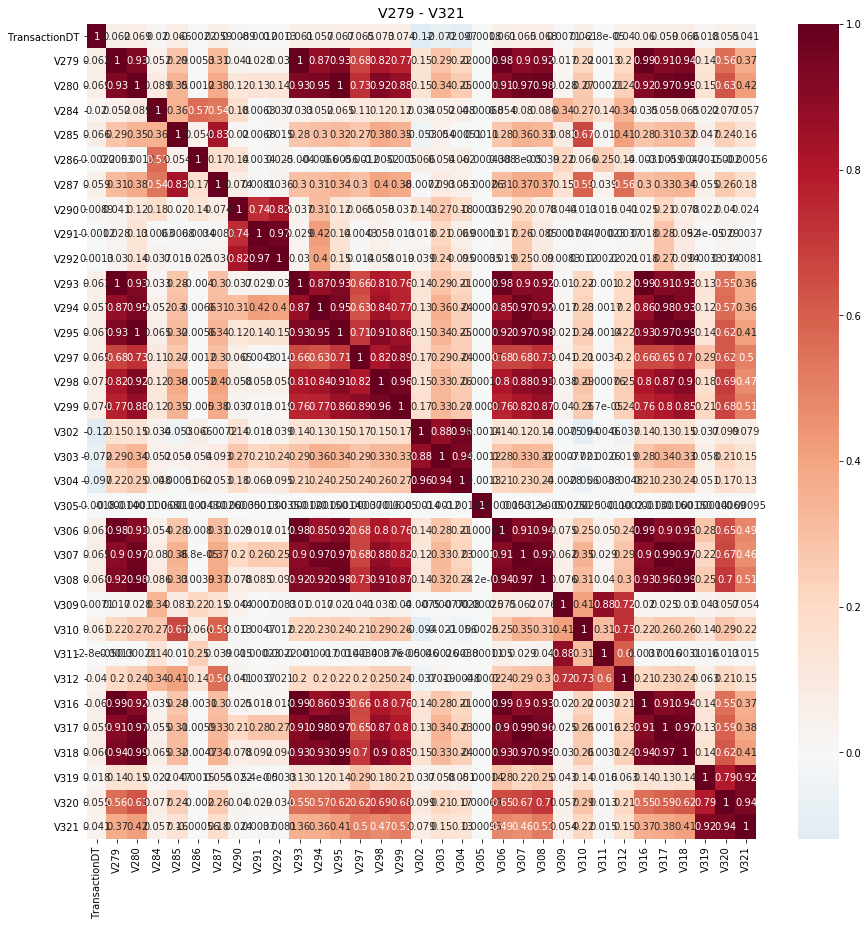

In [46]:
Vs = [x for x in nans_groups[12]]
make_corr(Vs)

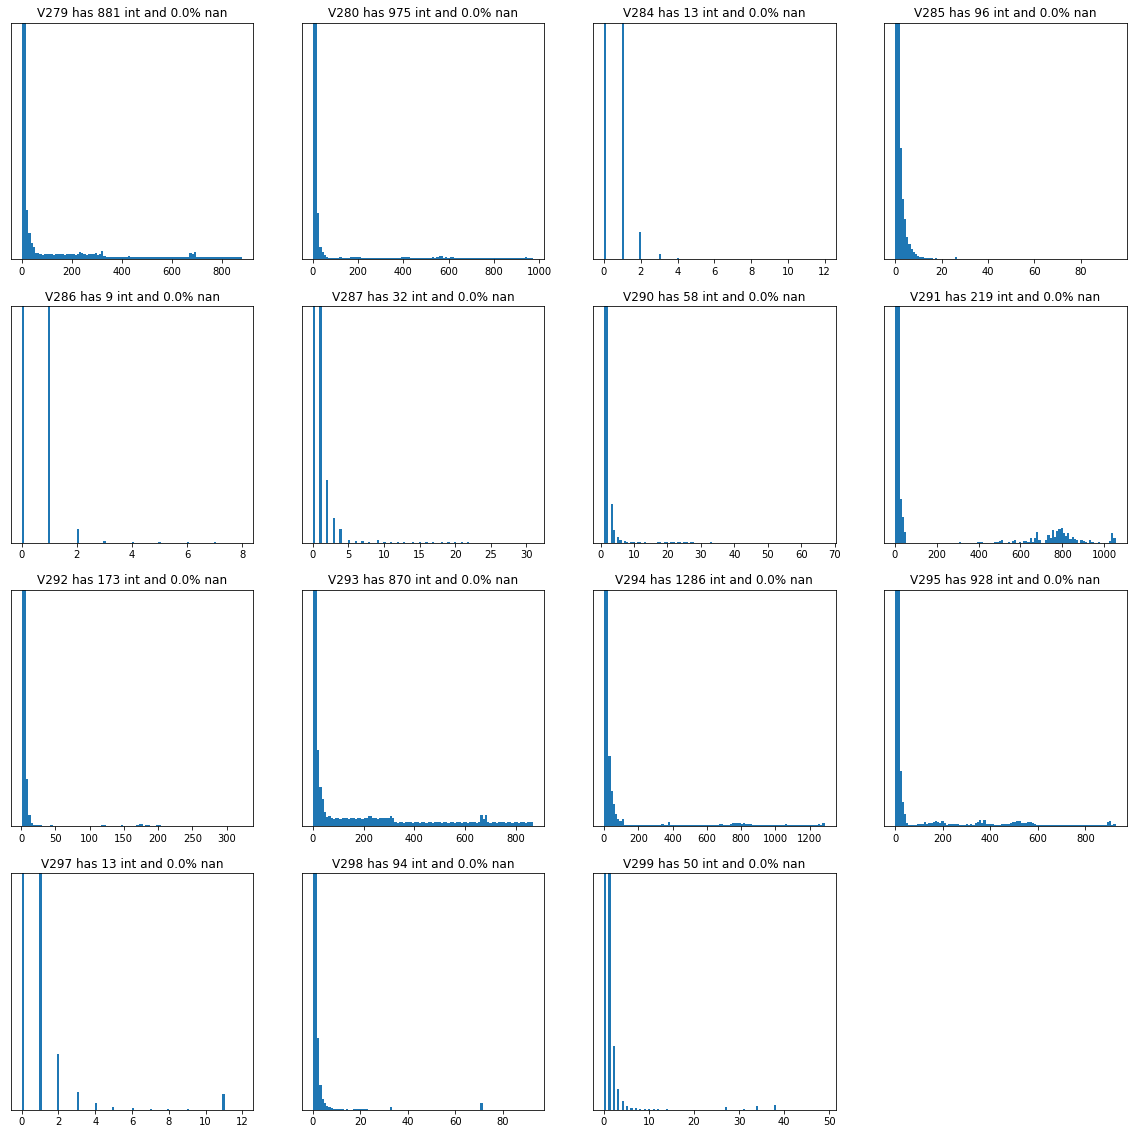

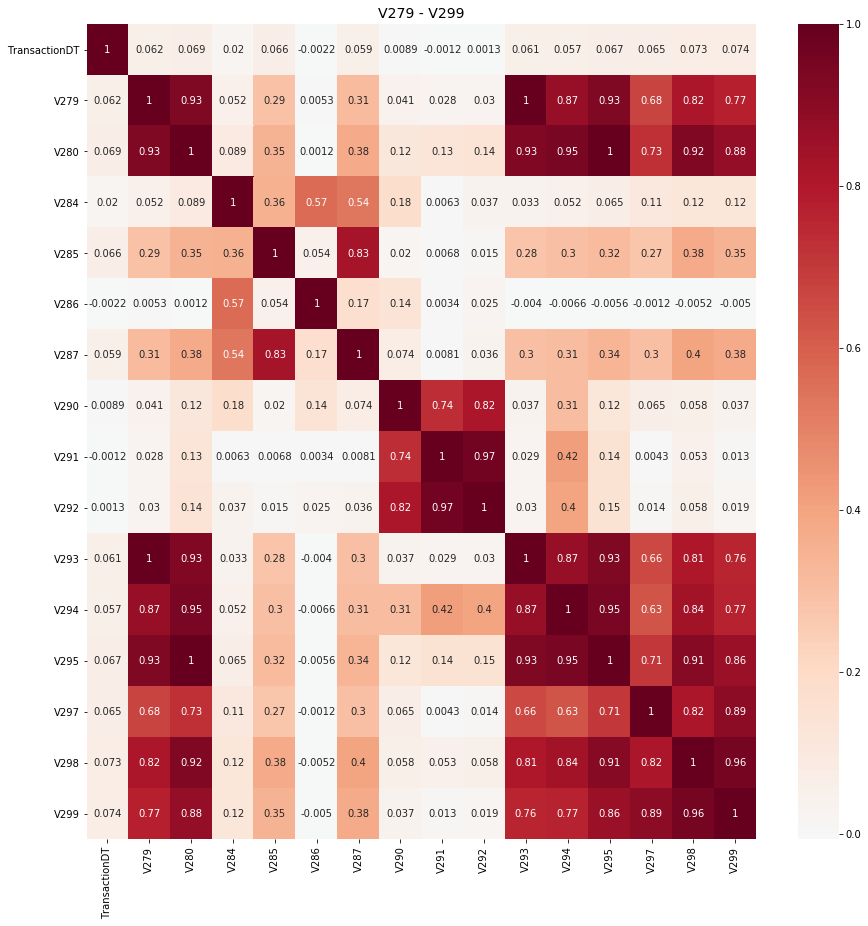

In [47]:
Vs = [x for x in nans_groups[12] if int(x[1:])<302]
make_plots(Vs)
make_corr(Vs)

In [48]:
grps = [[279,280,293,294,295,298,299],[284],[285,287],[286],[290,291,292],[297]]
reduce_group(grps)

Use these [294, 284, 285, 286, 291, 297]


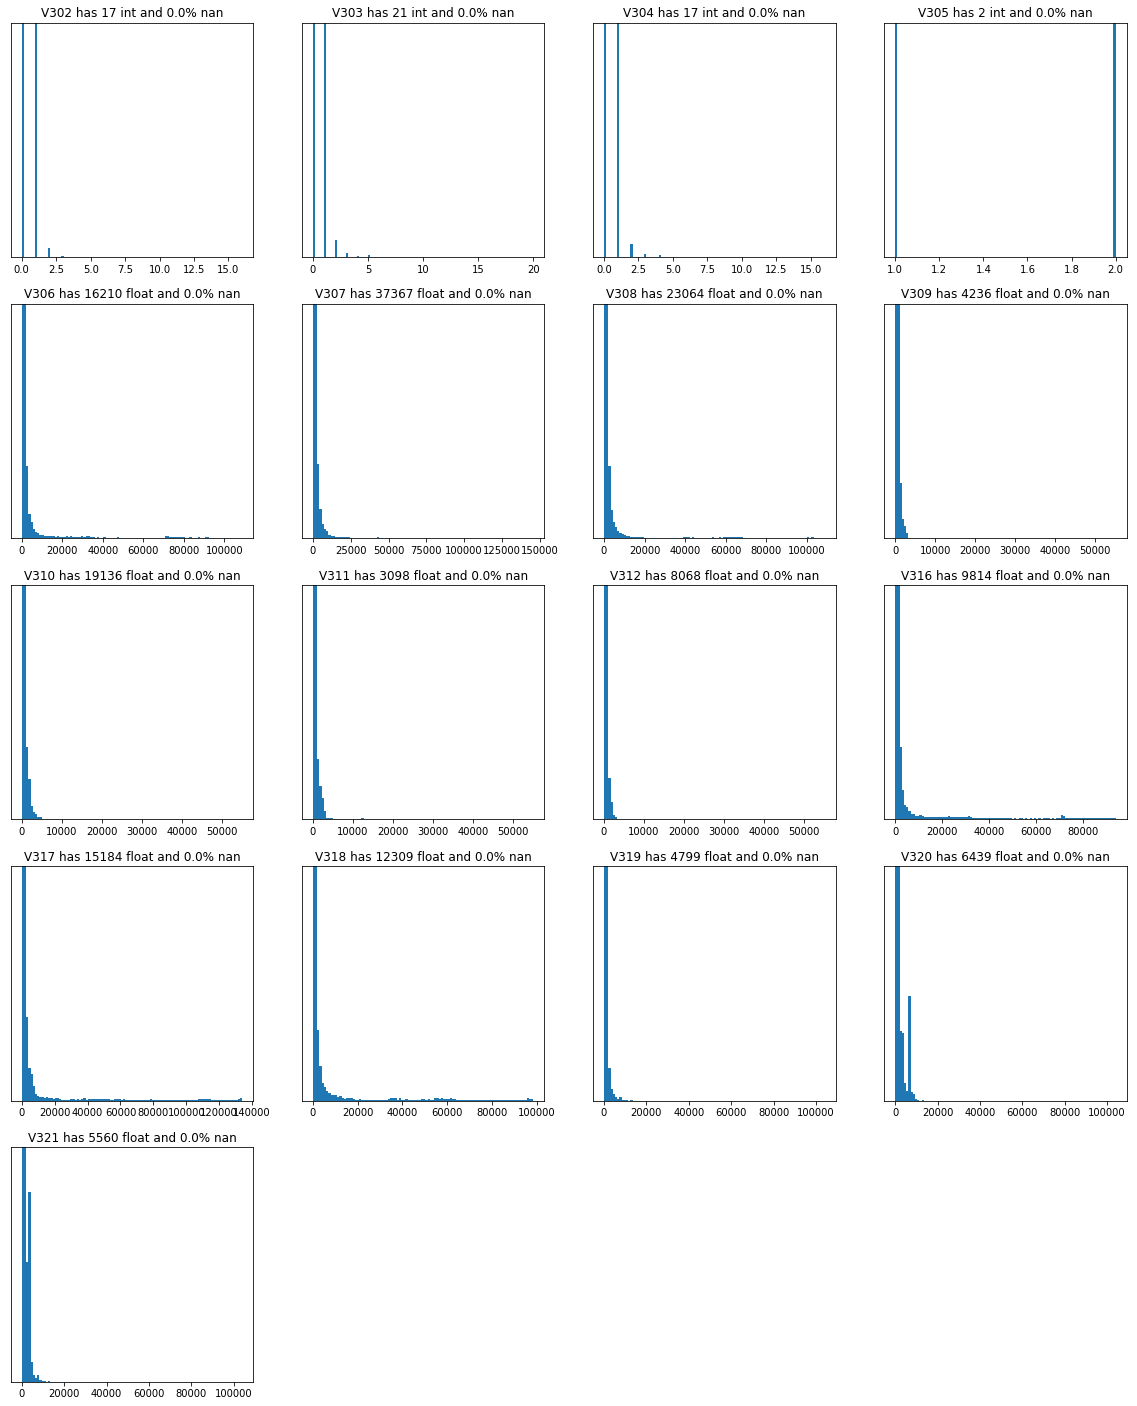

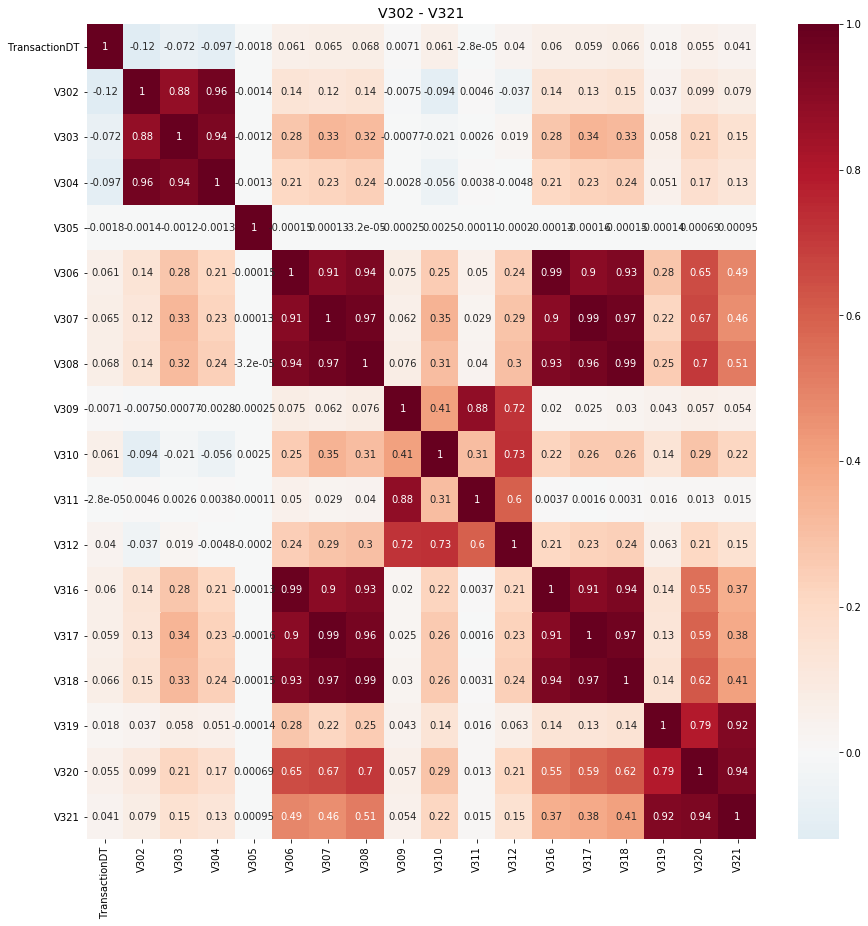

In [49]:
Vs = [x for x in nans_groups[12] if int(x[1:])>299]
make_plots(Vs)
make_corr(Vs)

In [50]:
grps = [[302,303,304],[305],[306,307,308,316,317,318],[309,311],[310,312],[319,320,321]]
reduce_group(grps)

Use these [303, 305, 307, 309, 310, 320]


### V281 ~ V315

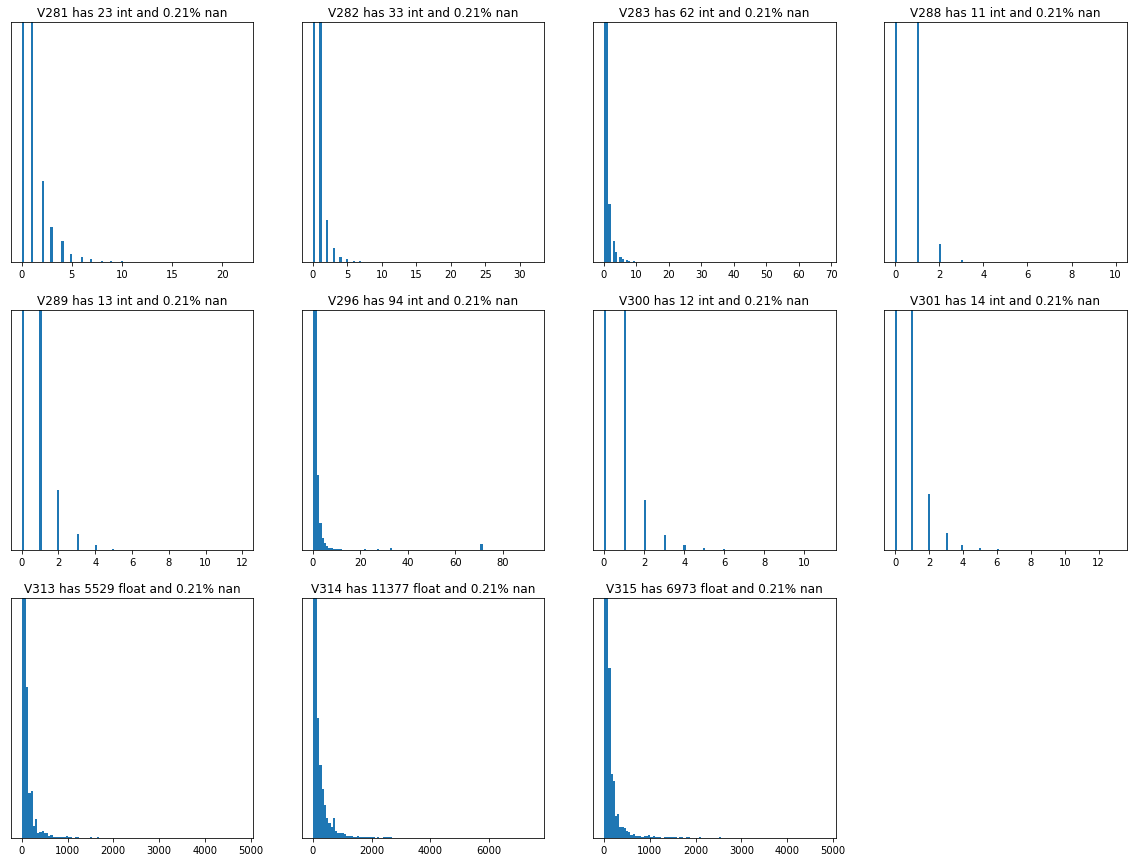

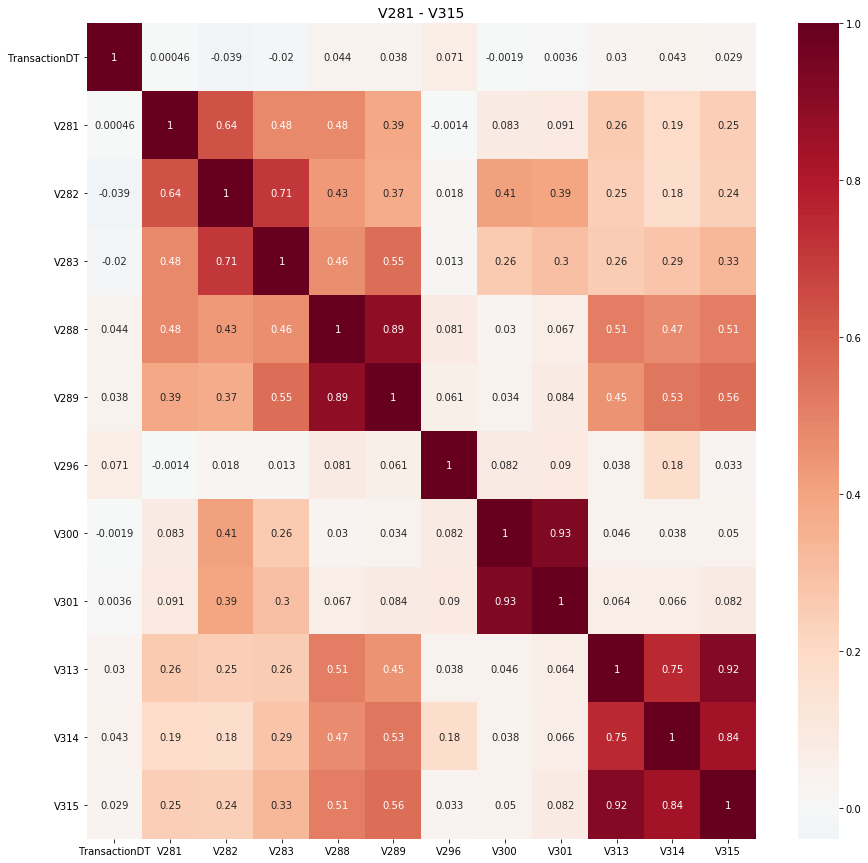

In [51]:
Vs = nans_groups[1269]
make_plots(Vs)
Vtitle = 'V281 - V315'
make_corr(Vs,Vtitle)

In [52]:
grps = [[281],[282,283],[288,289],[296],[300,301],[313,314,315]]
reduce_group(grps)

Use these [281, 283, 289, 296, 301, 314]


### V322 - V339

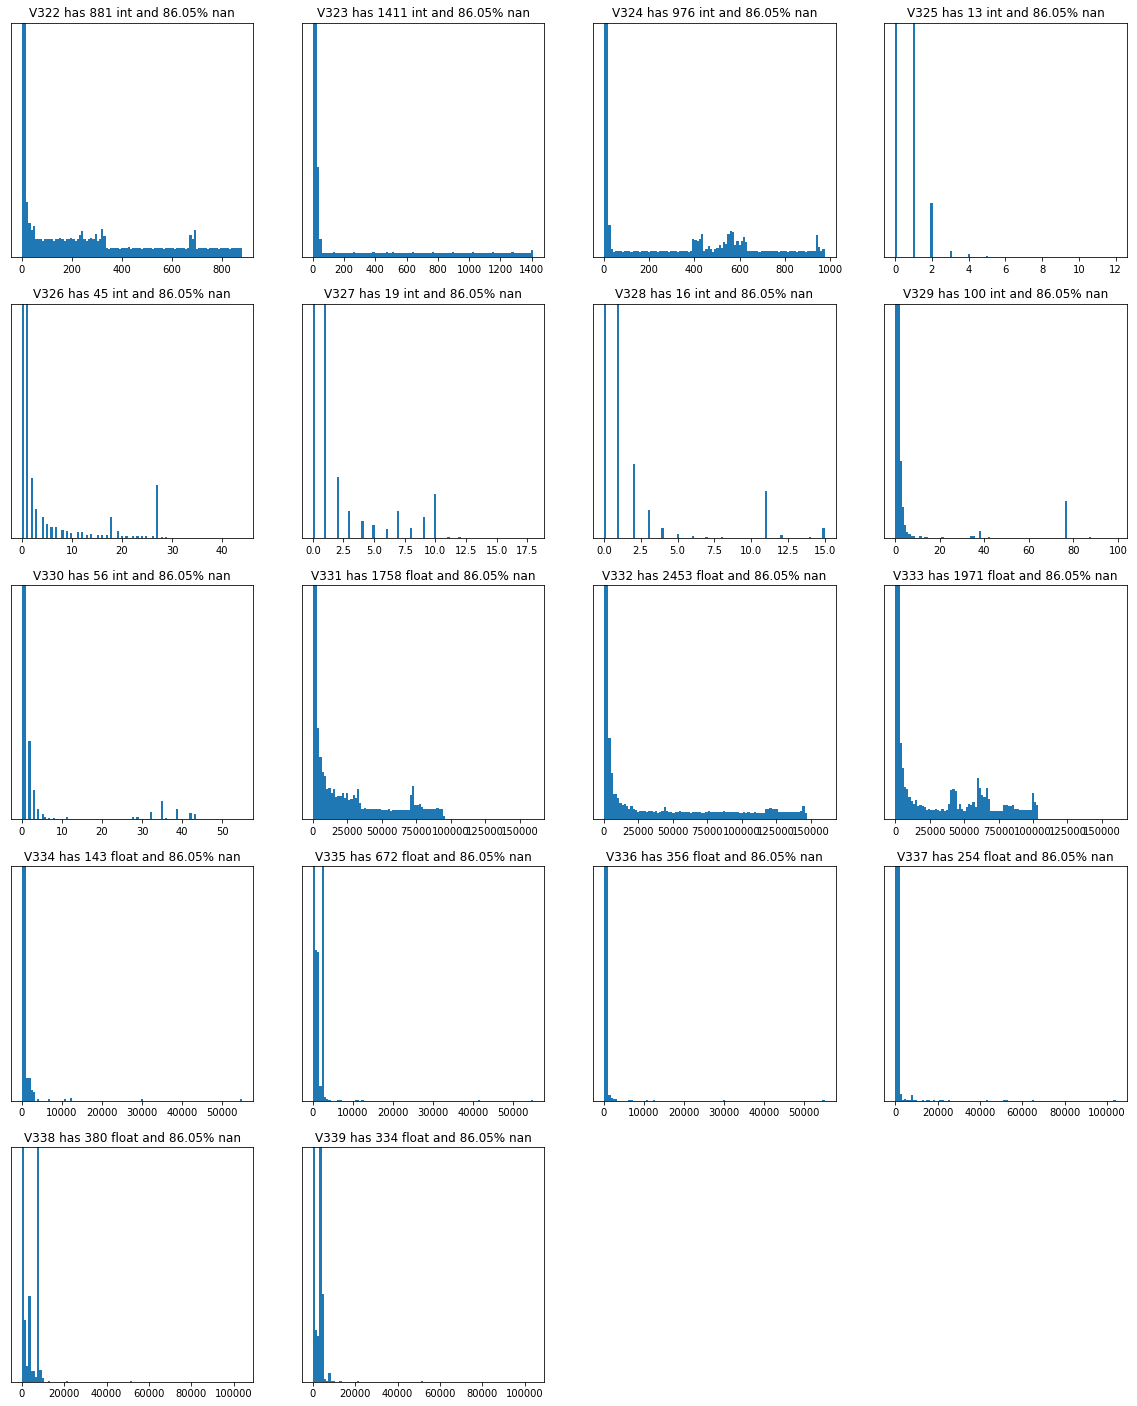

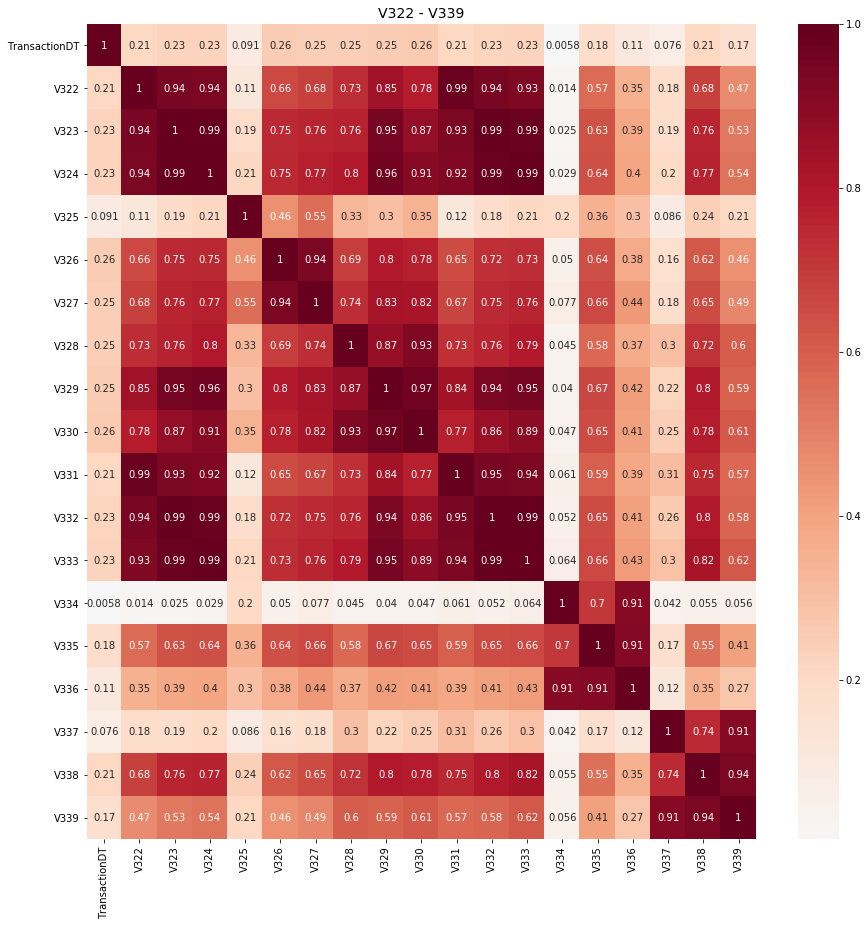

In [53]:
Vs = nans_groups[508189]
make_plots(Vs)
make_corr(Vs)

In [54]:
grps = [[322,323,324,326,327,328,329,330,331,332,333],[325],[334,335,336],[337,338,339]]
reduce_group(grps)

Use these [332, 325, 335, 338]


### Cột V sau khi đã được giảm
Ngay cả bộ giảm này vẫn có nhiều mối tương quan nội bộ. 

In [55]:
v =  [1, 3, 4, 6, 8, 11]
v += [13, 14, 17, 20, 23, 26, 27, 30]
v += [36, 37, 40, 41, 44, 47, 48]
v += [54, 56, 59, 62, 65, 67, 68, 70]
v += [76, 78, 80, 82, 86, 88, 89, 91]
v += [96, 98, 99, 104]
v += [107, 108, 111, 115, 117, 120, 121, 123]
v += [124, 127, 129, 130, 136]
v += [138, 139, 142, 147, 156, 162]
v += [165, 160, 166]
v += [178, 176, 173, 182]
v += [187, 203, 205, 207, 215]
v += [169, 171, 175, 180, 185, 188, 198, 210, 209]
v += [218, 223, 224, 226, 228, 229, 235]
v += [240, 258, 257, 253, 252, 260, 261]
v += [264, 266, 267, 274, 277]
v += [220, 221, 234, 238, 250, 271]
v += [294, 284, 285, 286, 291, 297]
v += [303, 305, 307, 309, 310, 320]
v += [281, 283, 289, 296, 301, 314]
v += [332, 325, 335, 338]

In [56]:
print('Reduced set has',len(v),'columns')

Reduced set has 128 columns


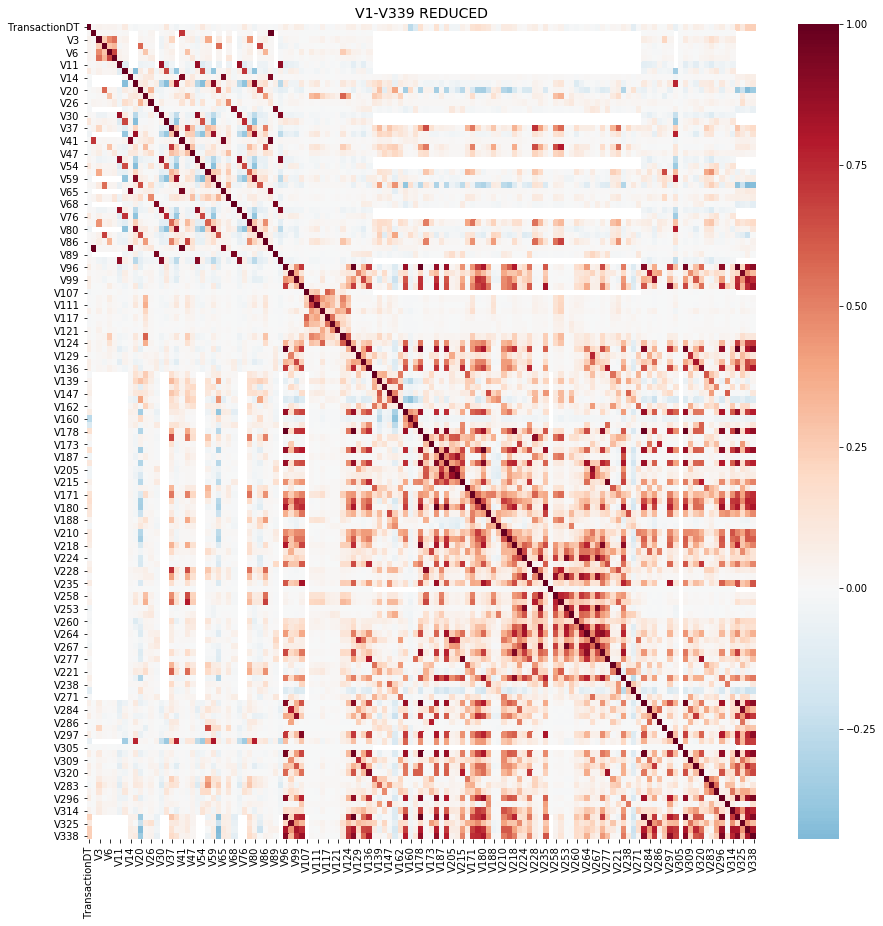

In [57]:
cols = ['TransactionDT'] + ['V'+str(x) for x in v]
train2 = train[cols].sample(frac=0.2)
plt.figure(figsize=(15,15))
sns.heatmap(train2[cols].corr(), cmap='RdBu_r', annot=False, center=0.0)
plt.title('V1-V339 REDUCED',fontsize=14)
plt.show()

### Tất cả V
Chúng tôi nhận thấy rằng 100 cột V đầu tiên không tương quan nhiều với 239 cột V cuối cùng. Ngoài ra, mặc dù 100 cột đầu tiên có 6 nhóm NAN khác nhau nhưng có nhiều mối tương quan giữa các nhóm. 239 cột sau liên quan đến nhau.

In [58]:
cols = ['TransactionDT'] + ['V'+str(x) for x in range(1,340)]
train[cols].sample(frac=0.2) 

TransactionDT   V1   V2   V3   V4   V5   V6   V7   V8   V9  V10  V11  \
407662       10288128  1.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0   
151089        3108423  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
197473        4468863  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
381552        9561741  1.0  3.0  3.0  3.0  3.0  3.0  3.0  3.0  3.0  1.0  1.0   
76614         1687391  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
...               ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
412480       10426973  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0   
206754        4749523  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
77338         1699333  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
526222       13826534  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0   
69579         1559407  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

        V12  V13  V14  V15  V16  V17  V18  V19  V20  V21  V22  V23  V24  V25  \
407662  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0   
151089  1.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0   
197473  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
381552  1.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0   
76614   1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0   
...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
412480  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0   
206754  0.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   
77338   0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0   
526222  1.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0   
69579   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

        V26  V27  V28  V29  V30  V31  V32  V33  V34  V35  V36  V37  V38  V39  \
407662  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  NaN  NaN  NaN  NaN  NaN   
151089  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0   
197473  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
381552  1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0   
76614   1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  NaN  NaN  NaN  NaN  NaN   
...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
412480  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0   
206754  1.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0   
77338   1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0   
526222  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0   
69579   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

        V40  V41  V42  V43  V44  V45  V46  V47  V48  V49  V50  V51  V52  V53  \
407662  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  1.0   
151089  0.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0   
197473  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
381552  0.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  1.0   
76614   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  0.0   
...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
412480  0.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
206754  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  0.0   
77338   0.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0   
526222  0.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0   
69579   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

        V54  V55  V56  V57  V58  V59  V60  V61  V62  V63  V64  V65  V66  V67  \
407662  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0   
1510

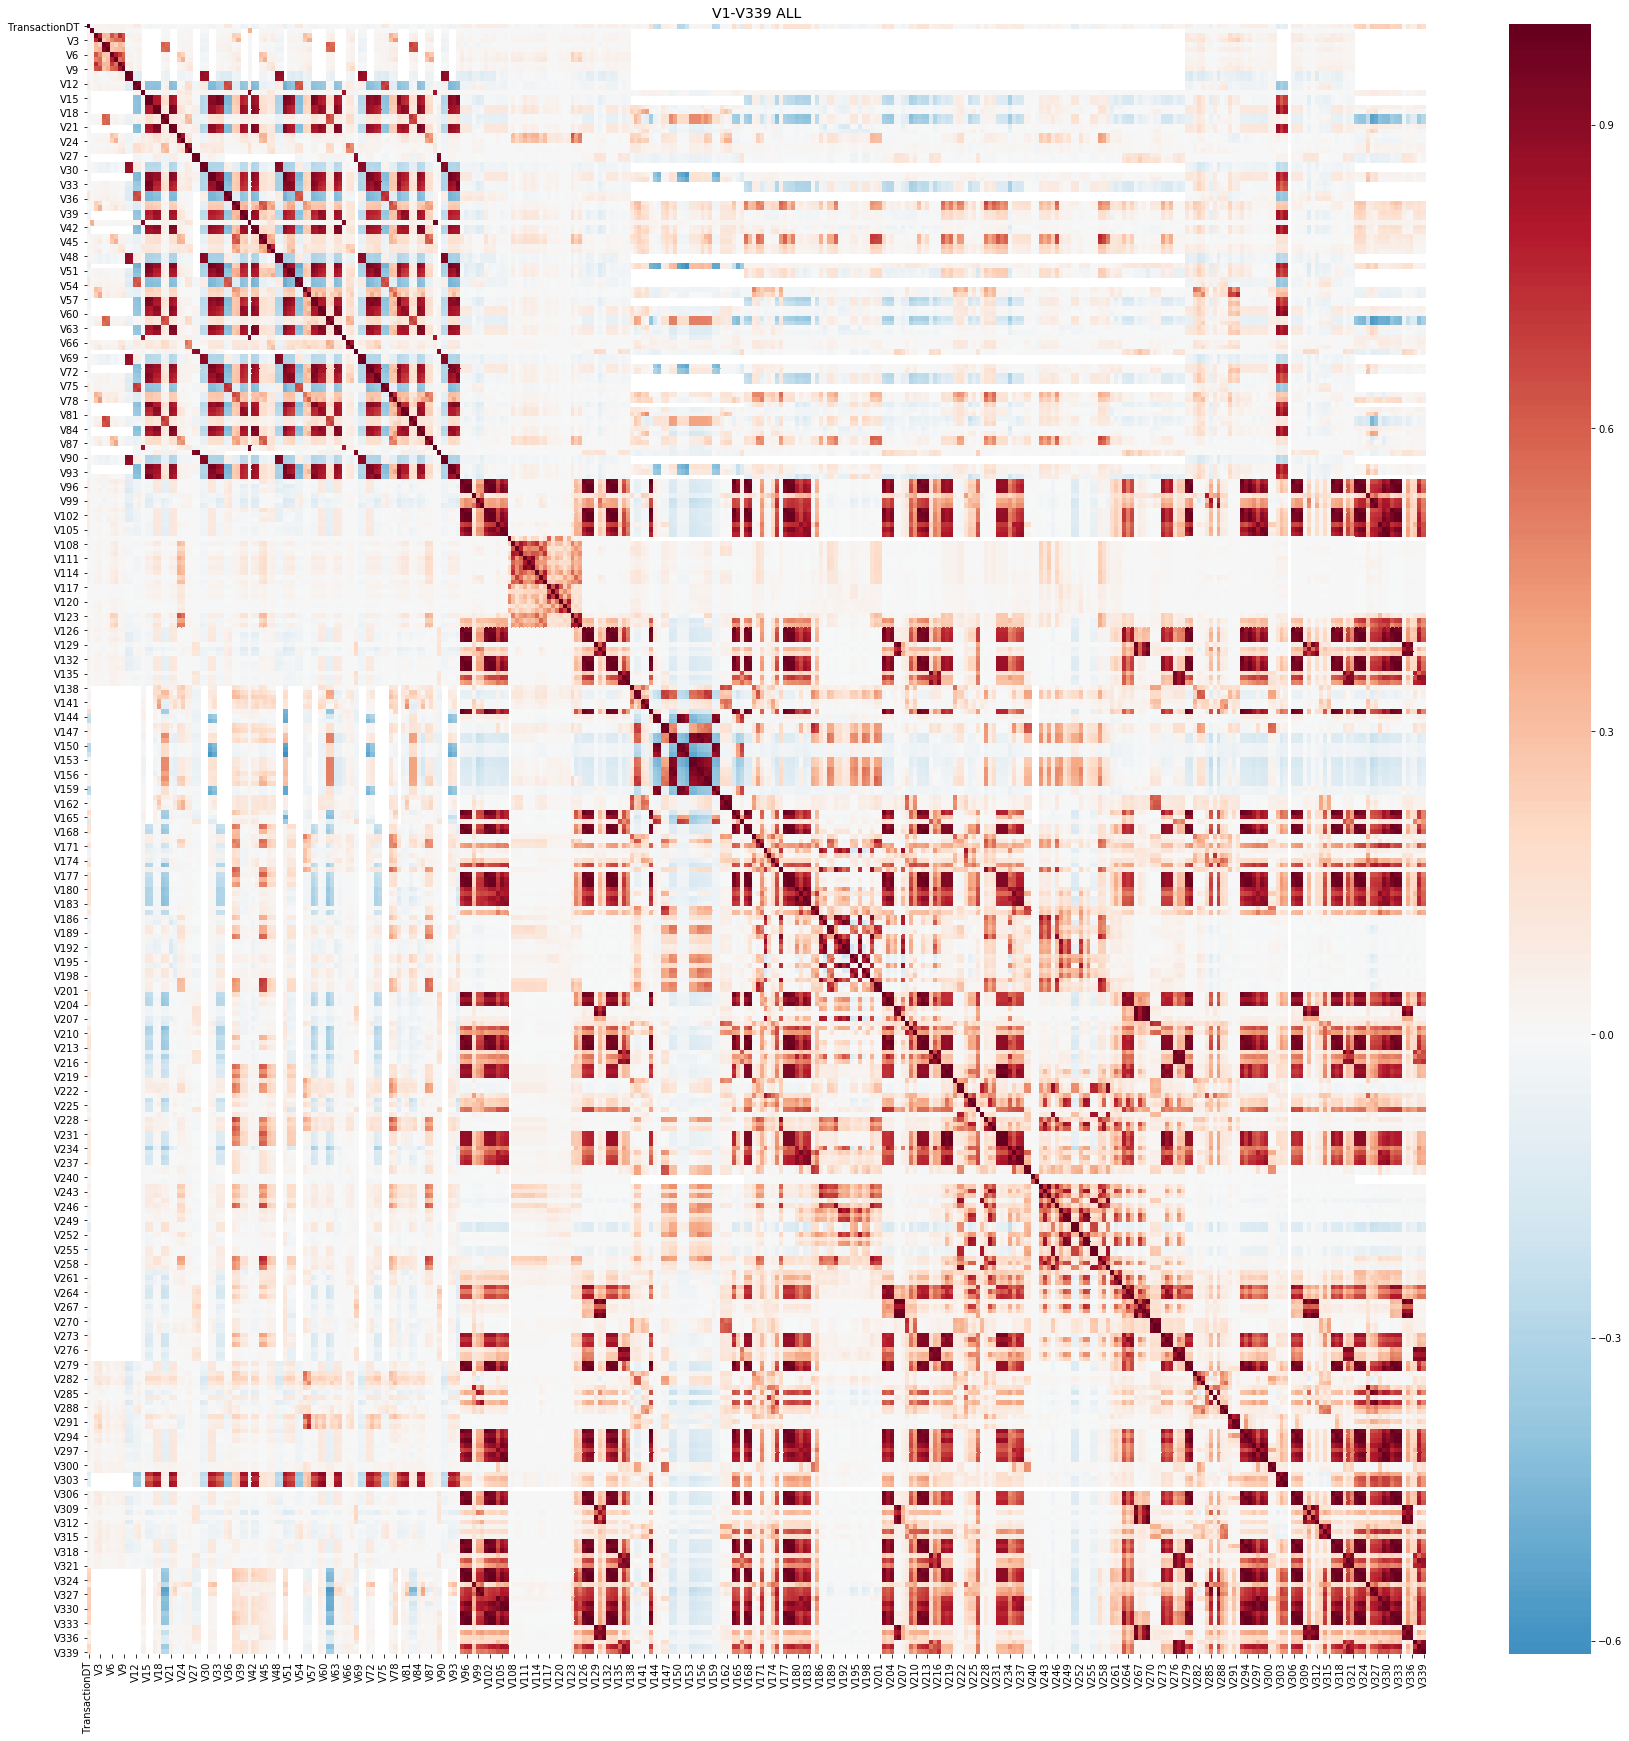

In [59]:
cols = ['TransactionDT'] + ['V'+str(x) for x in range(1,340)]
train2 = train[cols].sample(frac=0.2) # Lấy ngẫu nhiên 20% số dữ liệu
plt.figure(figsize=(30,30))
sns.heatmap(train2[cols].corr(), cmap='RdBu_r', annot=False, center=0.0)
plt.title('V1-V339 ALL',fontsize=14)
plt.show()

### Cột C

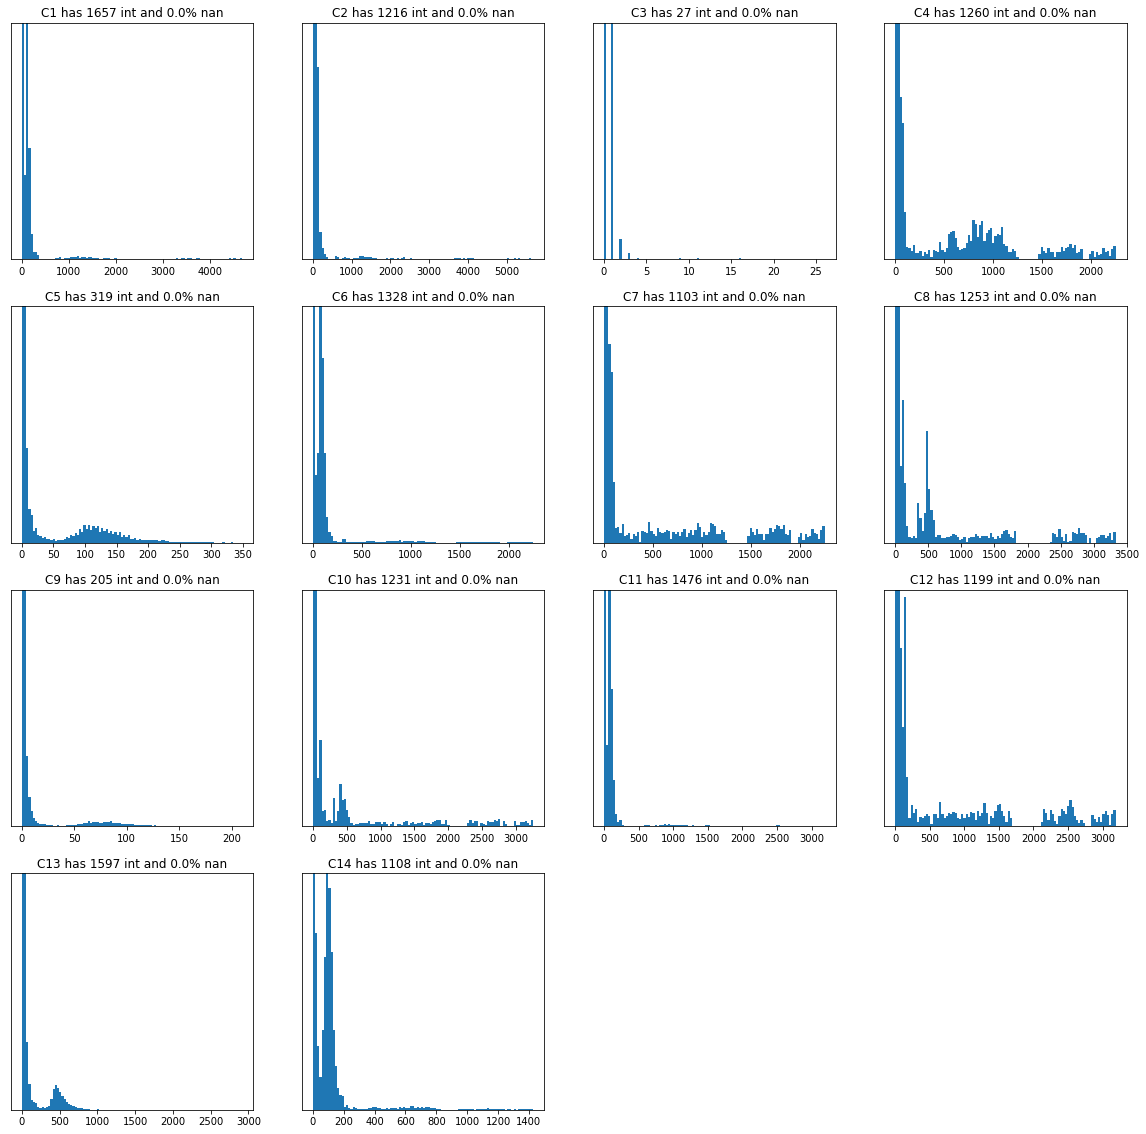

In [60]:
def make_plots2(Vs):
    col = 4
    row = len(Vs)//4+1
    plt.figure(figsize=(20,row*5))
    for i,v in enumerate(Vs):
        plt.subplot(row,col,i+1)
        idx = train[~train[v].isna()].index
        n = train[v].nunique()
        x = np.sum(train.loc[idx,v]!=train.loc[idx,v].astype(int))
        y = np.round(100*np.sum(train[v].isna())/len(train),2)
        t = 'int'
        if x!=0: t = 'float'
        plt.title(v+' has '+str(n)+' '+t+' and '+str(y)+'% nan')
        plt.yticks([])
        h = plt.hist(train.loc[idx,v],bins=100)
        if len(h[0])>1: plt.ylim((0,np.sort(h[0])[-2]))
    plt.show()
make_plots2(['C'+str(x) for x in range(1,15)])

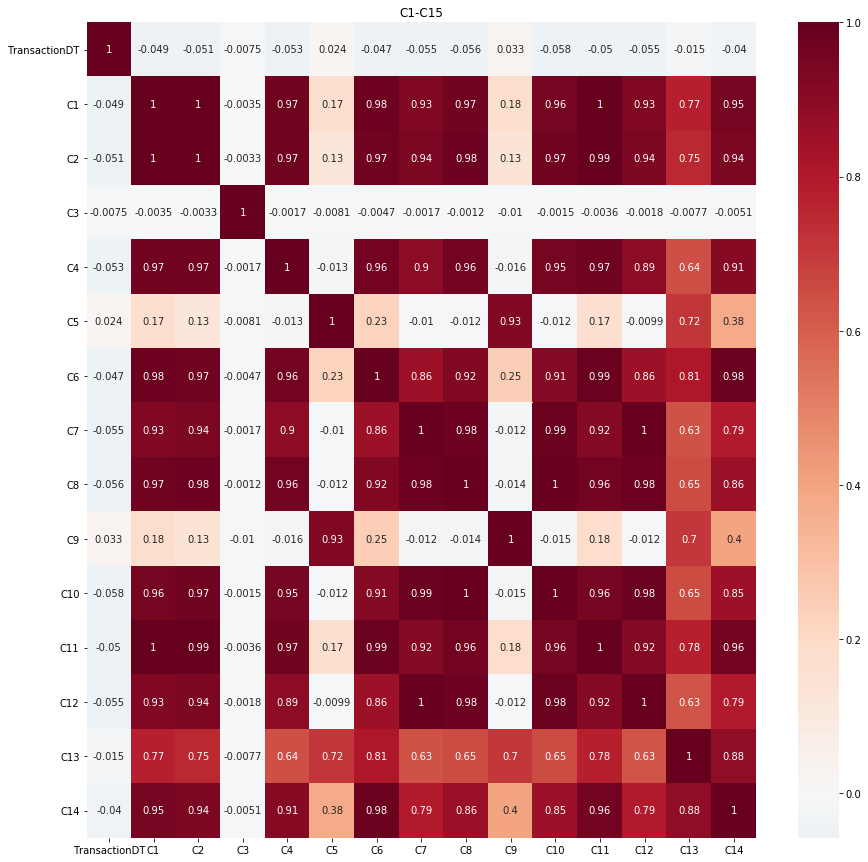

In [61]:
cols = ['TransactionDT'] + ['C'+str(x) for x in range(1,15)]
plt.figure(figsize=(15,15))
sns.heatmap(train[cols].corr(), cmap='RdBu_r', annot=True, center=0.0)
plt.title('C1-C15')
plt.show()

#### Cột D

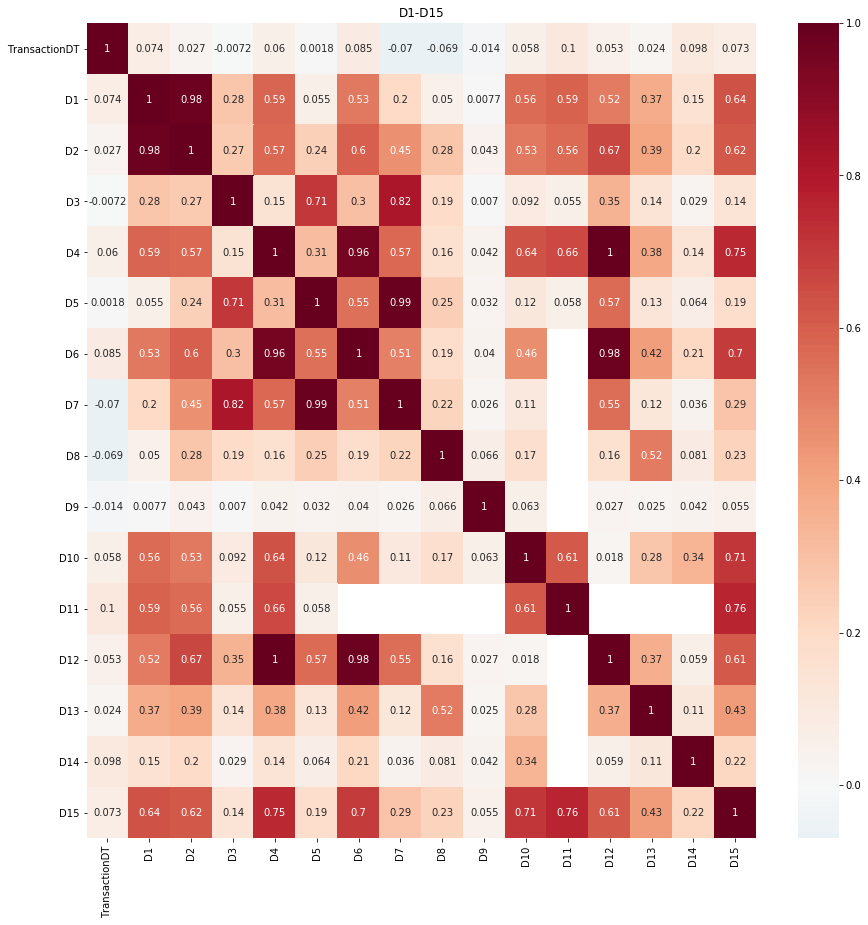

In [62]:
cols = ['TransactionDT'] + ['D'+str(x) for x in range(1,16)]
plt.figure(figsize=(15,15))
sns.heatmap(train[cols].corr(), cmap='RdBu_r', annot=True, center=0.0)
plt.title('D1-D15')
plt.show()

### Cột M

In [63]:
Ms = ['M'+str(x) for x in range(1,10)]
mp = {'F':0,'T':1,'M0':0,'M1':1,'M2':2}
for c in Ms: train[c] = train[c].map(mp)

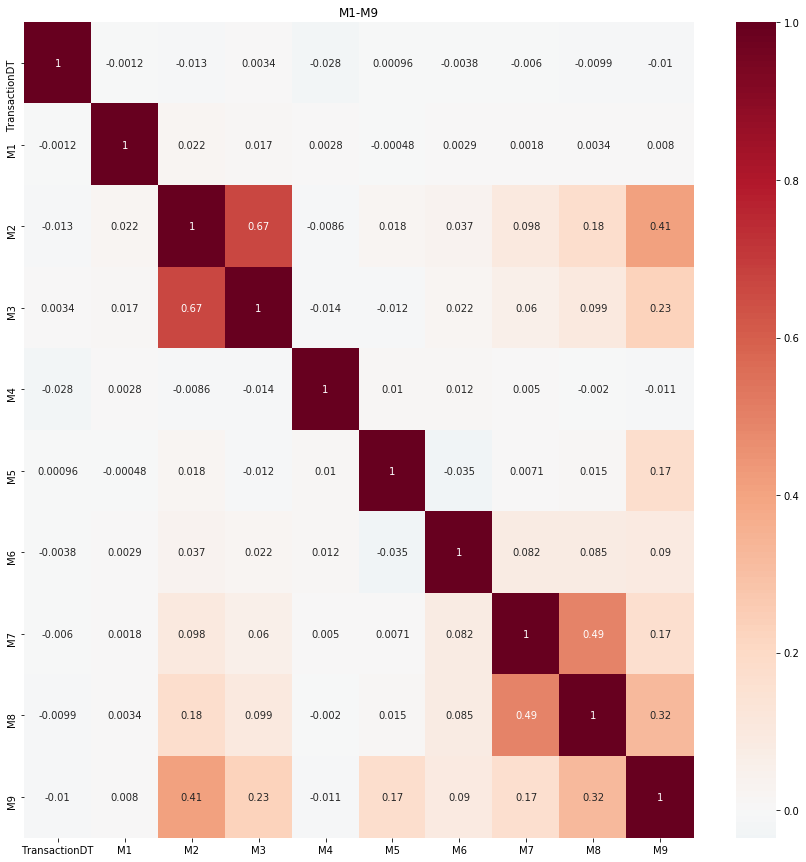

In [64]:
cols = ['TransactionDT'] + Ms
plt.figure(figsize=(15,15))
sns.heatmap(train[cols].corr(), cmap='RdBu_r', annot=True, center=0.0)
plt.title('M1-M9')
plt.show()

### Cột ID

In [65]:
train_id = pd.read_csv('../input/ieee-fraud-detection/train_identity.csv')
train_id = pd.merge(train_id,train[['TransactionID','TransactionDT']],on='TransactionID',how='left')
ids = ['id_0'+str(x) for x in range(1,10)]+['id_'+str(x) for x in range(10,39)]
for c in ids: print (c,train_id[c].unique()[:10])

id_01 [  0.  -5. -15. -10. -20. -40. -30. -25. -55. -45.]
id_02 [ 70787.  98945. 191631. 221832.   7460.  61141.     nan  31964. 116098.
 257037.]
id_03 [nan  0.  3.  2.  5.  1.  6.  9.  4. -5.]
id_04 [ nan   0. -11.  -5.  -8.  -1.  -6.  -9.  -3. -13.]
id_05 [nan  0.  1.  3.  2.  9. 12.  6.  4. 21.]
id_06 [ nan  -5.   0.  -6. -10. -11.  -1.  -4. -43.  -9.]
id_07 [nan 22.  6. -1.  4.  2. 17. 12. 27.  5.]
id_08 [  nan  -34.  -55. -100.  -15.  -33.  -13.  -36.  -44.  -26.]
id_09 [nan  0.  3.  2.  1.  5. -8.  7.  4.  6.]
id_10 [ nan   0.  -9. -42.  -6. -29.  -8.  -1.  -5. -11.]
id_11 [100.                  nan  93.75        95.08000183  95.65000153
  94.29000092  96.19000244  90.56999969  97.54000092  96.43000031]
id_12 ['NotFound' 'Found']
id_13 [nan 49. 52. 14. 20. 55. 43. 18. 41. 63.]
id_14 [-480. -300.   nan -360. -420. -540. -600.  480. -240.  300.]
id_15 ['New' 'Found' nan 'Unknown']
id_16 ['NotFound' 'Found' nan]
id_17 [166. 121. 225.  nan 102. 148. 199. 146. 144. 133.]
id_18 [nan 1

In [66]:
booln = ['id_12','id_15','id_16','id_27','id_28','id_29','id_35','id_36','id_37','id_38']
cats = ['id_23','id_30','id_31','id_33','id_34']
mp = {'Unknown':0,'NotFound':1,'Found':2,'New':3,'F':0,'T':1}
for c in booln: train_id[c] = train_id[c].map(mp)
print(len(booln) + len(cats))

15


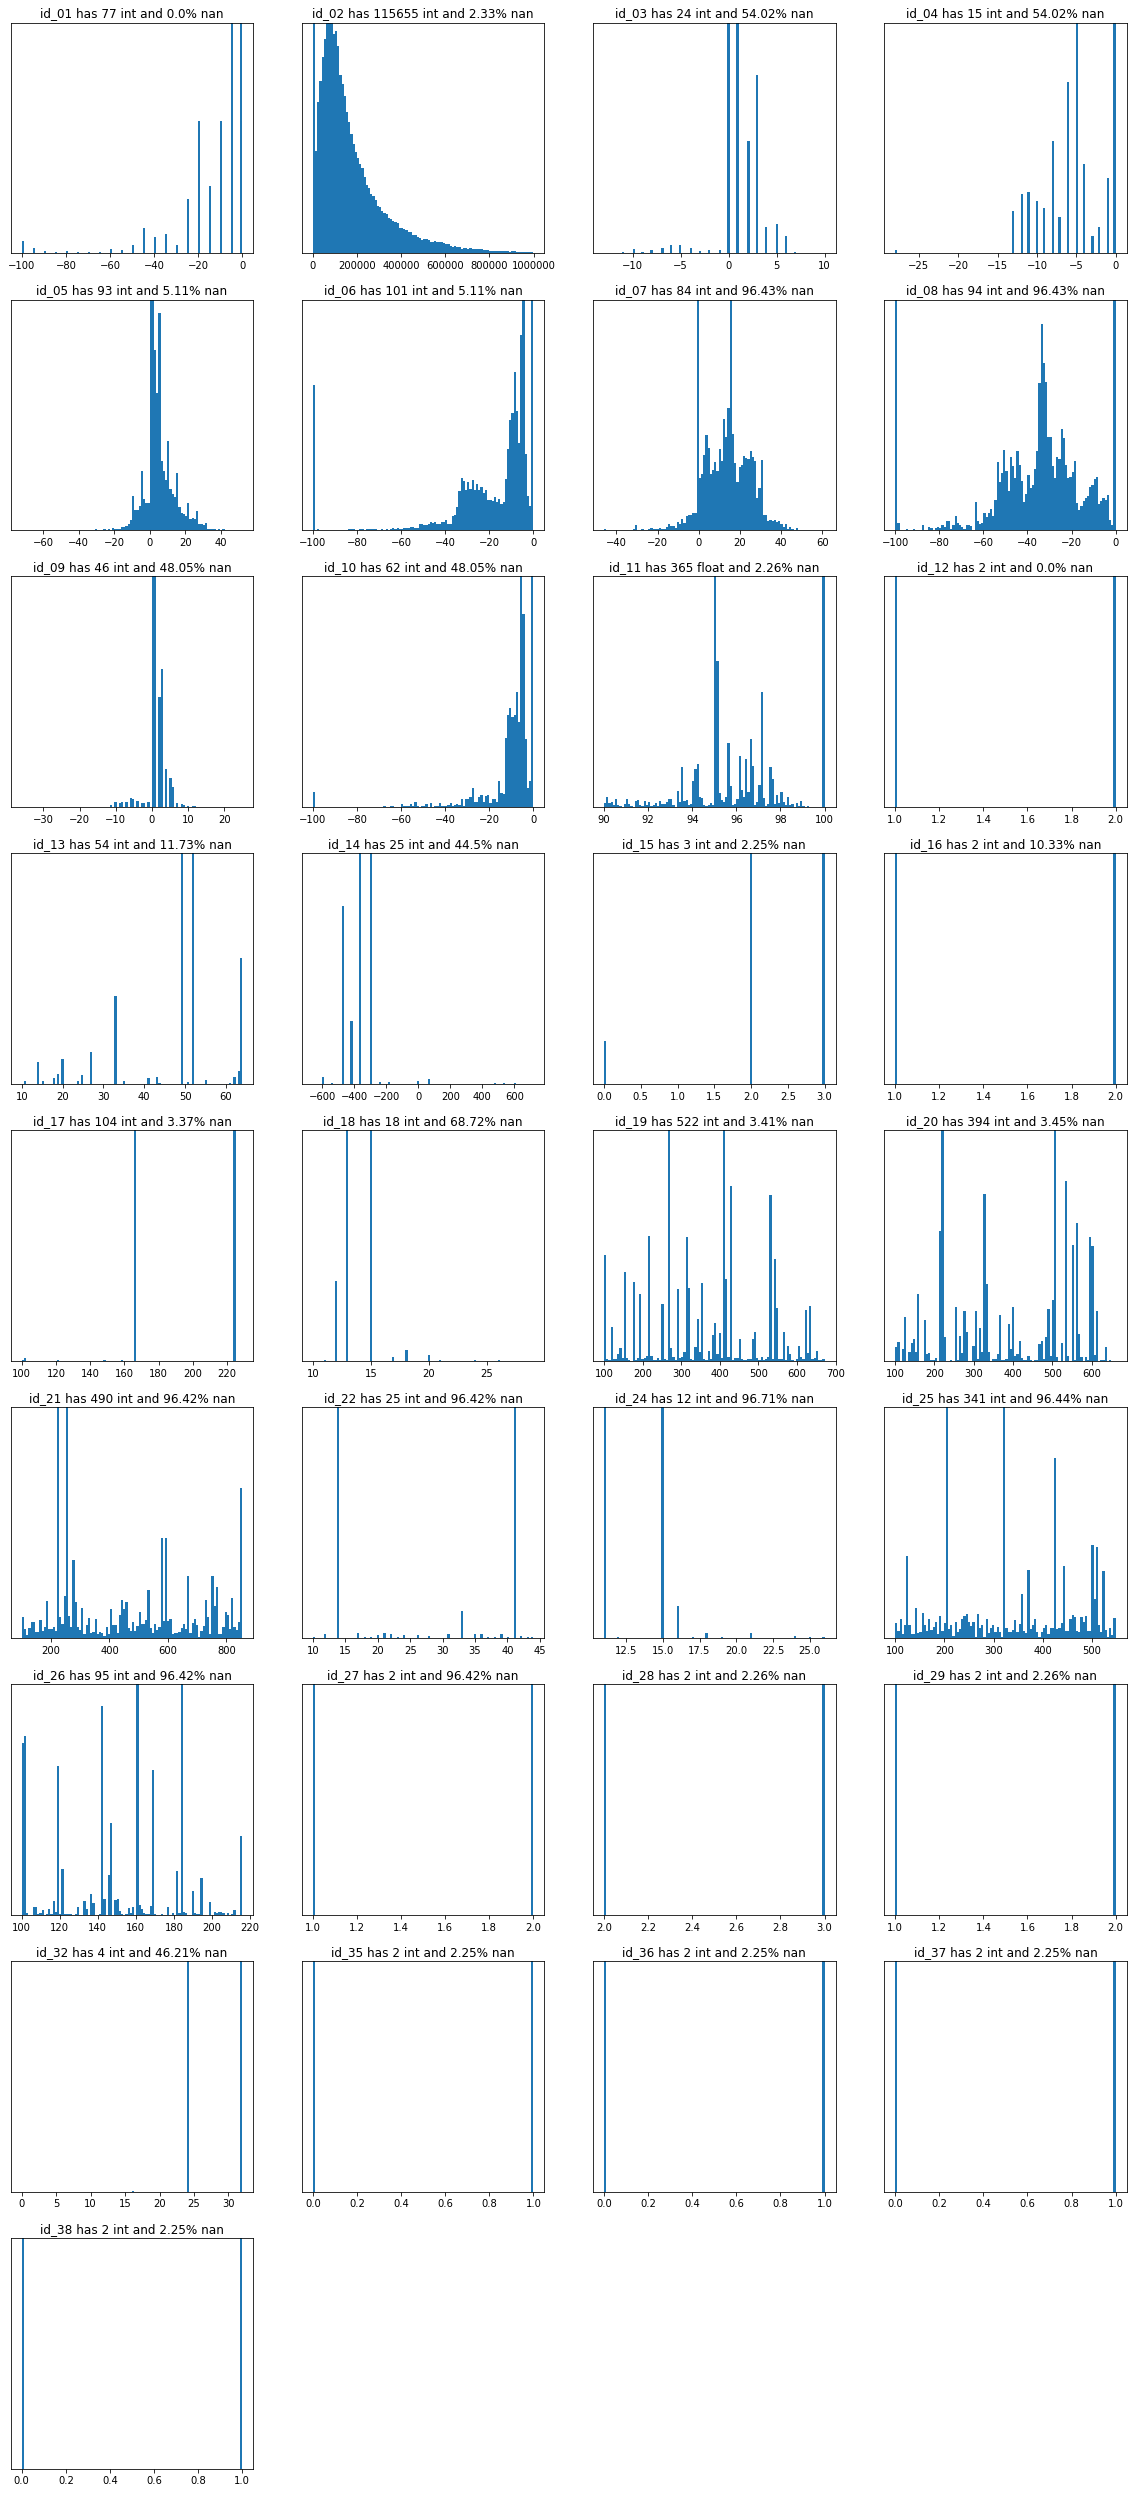

In [67]:
def make_plots2(Vs):
    col = 4
    row = len(Vs)//4+1
    plt.figure(figsize=(20,row*5))
    for i,v in enumerate(Vs):
        plt.subplot(row,col,i+1)
        idx = train_id[~train_id[v].isna()].index
        n = train_id[v].nunique()
        x = np.sum(train_id.loc[idx,v]!=train_id.loc[idx,v].astype(int))
        y = np.round(100*np.sum(train_id[v].isna())/len(train_id),2)
        t = 'int'
        if x!=0: t = 'float'
        plt.title(v+' has '+str(n)+' '+t+' and '+str(y)+'% nan')
        plt.yticks([])
        h = plt.hist(train_id.loc[idx,v],bins=100)
        if len(h[0])>1: plt.ylim((0,np.sort(h[0])[-2]))
    plt.show()
make_plots2([x for x in ids if x not in cats])

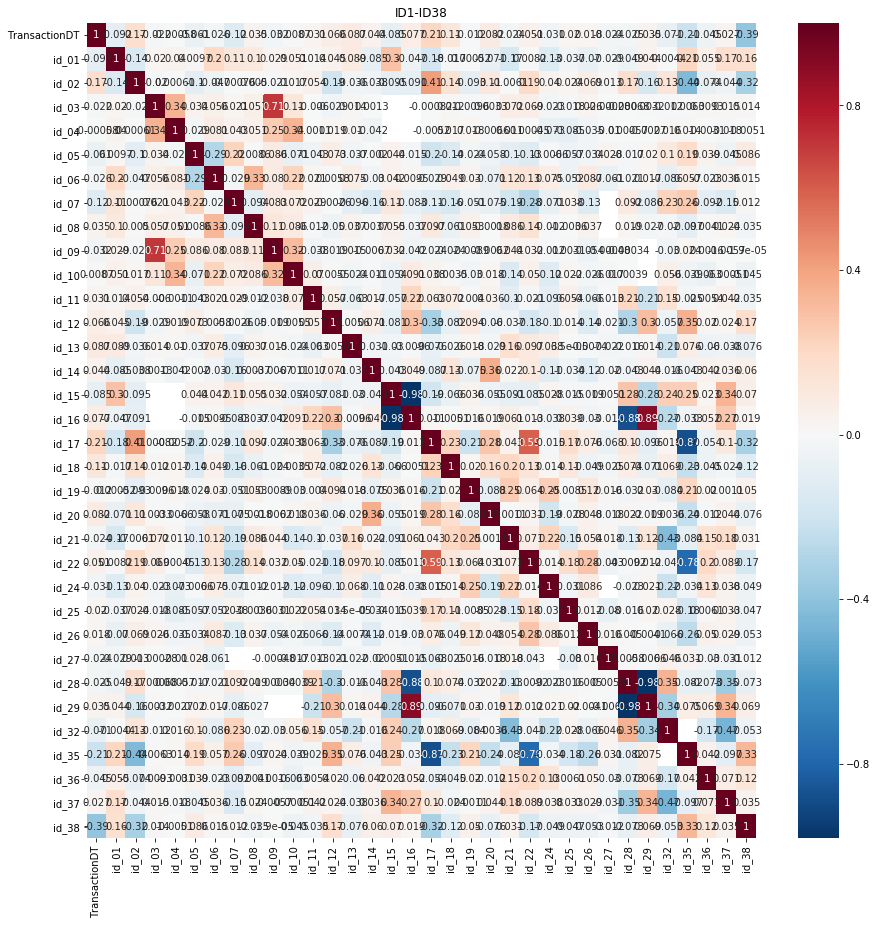

In [68]:
cols = ['TransactionDT'] + [x for x in ids if x not in cats]
plt.figure(figsize=(15,15))
sns.heatmap(train_id[cols].corr(), cmap='RdBu_r', annot=True, center=0.0)
plt.title('ID1-ID38')
plt.show()